# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. **Наша задача** — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Так, перед нами стоит несколько заданий в рамках данной задачи:


**1)** `Посчитать день недели, месяц и год публикации объявления.`

**2)**  `Посчитать этаж квартиры; варианты — первый, последний, другой.`

**3)**  `Посчитать соотношение жилой и общей площади, а также отношение площади кухни к общей`

**4)**  `Изучить следующие параметры: площадь, цена, число комнат, высота потолков`

**5)**  `Изучить время продажи квартиры. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? Убрать редкие и выбивающиеся значения. Опишите, какие особенности были обнаружены.`

**6)**  `Выяснить, какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. `

**7)**  `Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. `

**8)**  `Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге. Наша задача — выяснить, какая область входит в центр и посчитать цену для каждого километра.`

**9)** `Выделить сегмент квартир в центре. Проанализировать зависимость стоимости квартиры в центре от прочих факторов и сравнить полученные результаты с данными по всему городу.`

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных-и-упрощение-таблицы" data-toc-modified-id="Замена-типа-данных-и-упрощение-таблицы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных и упрощение таблицы</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Рассчитываем-цену-квадратного-метра" data-toc-modified-id="Рассчитываем-цену-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Рассчитываем цену квадратного метра</a></span></li><li><span><a href="#Рассчитываем-день-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="Рассчитываем-день-недели,-месяц-и-год-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Рассчитываем день недели, месяц и год публикации объявления</a></span></li><li><span><a href="#Рассчитываем-этаж-квартиры;-варианты-—-первый,-последний,-другой" data-toc-modified-id="Рассчитываем-этаж-квартиры;-варианты-—-первый,-последний,-другой-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Рассчитываем этаж квартиры; варианты — первый, последний, другой</a></span></li><li><span><a href="#Рассчитываем-соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей" data-toc-modified-id="Рассчитываем-соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Рассчитываем соотношение жилой и общей площади, а также отношение площади кухни к общей</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-и-построение-гистограмм" data-toc-modified-id="Изучение-параметров-и-построение-гистограмм-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров и построение гистограмм</a></span><ul class="toc-item"><li><span><a href="#Изучим-площадь" data-toc-modified-id="Изучим-площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Изучим площадь</a></span></li><li><span><a href="#Изучим-цену" data-toc-modified-id="Изучим-цену-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Изучим цену</a></span></li><li><span><a href="#Изучим-число-комнат" data-toc-modified-id="Изучим-число-комнат-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Изучим число комнат</a></span></li><li><span><a href="#Изучим-высоту-потолков" data-toc-modified-id="Изучим-высоту-потолков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Изучим высоту потолков</a></span></li></ul></li><li><span><a href="#Выполняем-задания" data-toc-modified-id="Выполняем-задания-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выполняем задания</a></span><ul class="toc-item"><li><span><a href="#Изучим-время-продажи-квартиры." data-toc-modified-id="Изучим-время-продажи-квартиры.-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Изучим время продажи квартиры.</a></span></li><li><span><a href="#Изучим-влияние-различных-параметров-на-стоимость-квартиры." data-toc-modified-id="Изучим-влияние-различных-параметров-на-стоимость-квартиры.-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Изучим влияние различных параметров на стоимость квартиры.</a></span></li><li><span><a href="#Выяснить,-какая-область-входит-в-центр-Санкт-Петербурга" data-toc-modified-id="Выяснить,-какая-область-входит-в-центр-Санкт-Петербурга-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Выяснить, какая область входит в центр Санкт-Петербурга</a></span></li><li><span><a href="#Изучить-центр-Санкт-Петербурга" data-toc-modified-id="Изучить-центр-Санкт-Петербурга-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Изучить центр Санкт-Петербурга</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

Для решения поставленной задачи необходима работа с данными. Для работы же с данными нам необходимо с помощью `библиотеки` pandas прочитать датасет.

In [1]:
# импорт библиотеки pandas
import pandas as pd

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
# получение первых 10 строк таблицы df
df.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Мы столкнулись с первой проблемой, препятствующей решению задачи - данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv. Для этого нужно обработать данные с помощью параметра sep. Нужно указать в качестве разделителя знак табуляции - \t.

In [4]:
# чтение файла с данными, разделение их на столбцы и сохранение в df
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# получение первых 10 строк таблицы df
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Теперь с данными можно работать и обрабатывать их.

In [5]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
# получение дополнительной информации о данных в таблице df
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
#получим названия столбцев
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
#считаем количество столбцев
len(df.columns)

22

**Вывод**

Итак, в таблице двадцать два столбца. Тип данных в столбцах различается.
Согласно документации к данным:
*	`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
*	`balcony` — число балконов
*	`ceiling_height` — высота потолков (м)
*	`cityCenters_nearest` — расстояние до центра города (м)
*	`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
*	`first_day_exposition` — дата публикации
*	`floor` — этаж
*	`floors_total` — всего этажей в доме
*	`is_apartment` — апартаменты (булев тип)
*	`kitchen_area` — площадь кухни в квадратных метрах (м²)
*	`last_price` — цена на момент снятия с публикации
*	`living_area` — жилая площадь в квадратных метрах (м²)
*	`locality_name` — название населённого пункта
*	`open_plan` — свободная планировка (булев тип)
*	`parks_around3000` — число парков в радиусе 3 км
*	`parks_nearest` — расстояние до ближайшего парка (м)
*	`ponds_around3000` — число водоёмов в радиусе 3 км
*	`ponds_nearest` — расстояние до ближайшего водоёма (м)
*	`rooms` — число комнат
*	`studio` — квартира-студия (булев тип)
*	`total_area` — площадь квартиры в квадратных метрах (м²)
*	`total_images` — число фотографий квартиры в объявлении

В названиях столбцев встречается нарушение стиля  - наршуение регистра в столбцах `cityCenters_nearest` и `ponds_around3000`, `parks_around3000`.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения, что также подтверждается выведенными с помощью метода *head()* 10 строками столбцами. Судя по полученной информации с помощью методов *info()* и *describe()* пропусков довольно много.

В каждой строке датасета представлены данные об определенной квартире - одна строка соответствует одной квартире.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных.
В таблице встречаются вещественные числа - для удобства работы с данными считается разумным перевести их в целочисленные. Не исключено наличие дубликатов. Высота потолков тоже не внушает доверия, поскольку минимум согласно полученным сведениям для них составляет 1 м, что звучит крайне не правдоподобно.
Даты представлены в неудобном для Pethon формате.

## Предобработка данных

### Стиль заголовков


Исправим стиль заголовков

In [9]:
#получим названия столбцев
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [10]:
# переименование столбцов
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'ponds_around3000':'ponds_around_3000m', 'parks_around3000':'parks_around_3000m'})

In [11]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000m', 'parks_nearest', 'ponds_around_3000m',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Вывод**

Теперь названия столбцев соответсвуют правилам хорошего стиля и с ними уже можно работать.

### Обработка пропусков

Для того, чтобы можно было работать с данными, необходимо сначала посчитать пропуски, а затем устранить их или заменить по возможности.

Однако **не во всех столбцах пропуски мы будем устранять**, ведь нам нужны только те, что представляют интерес для решения поставленных задач!

In [12]:
#подсчёт пропусков и сортировка столбцов по убыванию пропусков
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000m       5518
ponds_around_3000m       5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

Чего и следовало ожидать - практически в половине столбцов присутствуют пропущенные значения, от которых необходимо избавиться.
Пропуски появились в таких столбцах, как:

- ceiling_height - высота потолков (м)
- floors_total - всего этажей в доме
- living_area - жилая площадь в квадратных метрах (м²)
- is_apartment - апартаменты (булев тип)
- kitchen_area - площадь кухни в квадратных метрах (м²)
- balcony - число балконов
- locality_name - — название населённого пункта
- airports_nearest -расстояние до ближайшего аэропорта в метрах (м)
- city_centers_nearest - расстояние до центра города (м)
- parks_around_3000km - число парков в радиусе 3 км
- parks_nearest  -расстояние до ближайшего парка (м)
- ponds_around_3000km -число водоёмов в радиусе 3 км
- ponds_nearest - расстояние до ближайшего водоёма (м)
- days_exposition - сколько дней было размещено объявление (от публикации до снятия)

**Однако для решения нашей задачи необходимы данные только в этих столбцах:**
- days_exposition (длительность объявления) - 3181 пропуск
- city_centers_nearest (расстояние до центра) - 5519 пропусков (однако нас волнуют больше те, что находятся в Санкт-Петербурге)
- locality_name (название населенного пункта) - 49
- ceiling_height (высота потолков) - 9195 пропусков
- living_area (жилая площадь) - 1903
- kitchen_area (площадь кухни) - 2278
- floors_total (общее количество этажей) - 86 (нужно, чтобы установить, является ли этаж последним или нет)

Пропуски же в остальных столбцах нас не волнуют.

Пропуски в столбце `days_exposition` возникли, вероятнее всего, в результате человеческого фактора и их довольно много. Для их устранения можно сгруппировать данные по временам года даты публикации и ценовым категориям, выявить среднее значение для каждой из групп, а затем пропущенные значения заполнить этими средними. Логика данного способа заключается в том, что можно предположить, что в определенные года на квартиры с определенной ценовой категорией был различный спрос, от которого и зависила длительность размещения объявления.

In [13]:
#считаем количество пропусков
df['days_exposition'].isna().sum()

3181

Для того, чтобы сгруппировать данные по годам, нужно привести соответсвующий столбец в порядок. Вспомним, как он выглядит:

In [14]:
#выведем на экран значения 3 необходимых для устранения пропусков столбцев
df[['first_day_exposition', 'days_exposition', 'last_price']].head(10)

,first_day_exposition,days_exposition,last_price
0,2019-03-07T00:00:00,NaN,13000000.0
1,2018-12-04T00:00:00,81.0,3350000.0
2,2015-08-20T00:00:00,558.0,5196000.0
3,2015-07-24T00:00:00,424.0,64900000.0
4,2018-06-19T00:00:00,121.0,10000000.0
5,2018-09-10T00:00:00,55.0,2890000.0
6,2017-11-02T00:00:00,155.0,3700000.0
7,2019-04-18T00:00:00,NaN,7915000.0
8,2018-05-23T00:00:00,189.0,2900000.0
9,2017-02-26T00:00:00,289.0,5400000.0


Используем чудесный метод to_datetime() для перевода дат в понятный для Python язык - в формате укажем следующее: '%Y-%m-%dT%H:%M:%S'

In [15]:
#меняем формат записи данных о дате
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
#снова выводим необходимые столбцы
df[['first_day_exposition', 'days_exposition', 'last_price']].head(10)

,first_day_exposition,days_exposition,last_price
0,2019-03-07,NaN,13000000.0
1,2018-12-04,81.0,3350000.0
2,2015-08-20,558.0,5196000.0
3,2015-07-24,424.0,64900000.0
4,2018-06-19,121.0,10000000.0
5,2018-09-10,55.0,2890000.0
6,2017-11-02,155.0,3700000.0
7,2019-04-18,NaN,7915000.0
8,2018-05-23,189.0,2900000.0
9,2017-02-26,289.0,5400000.0


Теперь все в порядке. Для группировки данных нам необходимо получить месяца и года появления объявления - помогут нам в этом операторы `year` и `month`.

In [17]:
#выводим года в отдельный столбец
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
#выводим месяца в отдельный столбец
df['season'] = pd.DatetimeIndex(df['first_day_exposition']).month 
#выводим первые 5 строк на экран
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,year,season
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,6


Мы получили столбцы с годом и номером месяца для того, чтобы категоризировать данные по временам года для дальнейшей группировки. 

In [18]:
#создаем собственную функцию для определения времени года
def season(row):
    if 8 < row < 12:
        return 'осень'
    elif 2 < row &  row <6:
        return 'весна'
    elif 5 < row &  row <9:
        return 'лето'  
    else:
        return 'зима'

In [19]:
#применяем функцию к нашей таблице
df['season'] = df['season'].apply(season)
#выводим на экран первые десять строк таблицы
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,year,season
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019,весна
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,зима
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,лето
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015,лето
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,лето
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018,осень
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2017,осень
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2019,весна
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2018,весна
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,2017,зима


Так как минимальное количество дней, которое объявление было размещено равно 1, а максимально 1580, то при поиске среднего возможен сдвиг к аномально большим результатам. Проверим это:

In [20]:
#найдем медиану
df['days_exposition'].median()

95.0

In [21]:
#найдем среднее
df['days_exposition'].mean()

180.88863436982163

Что и требовалось доказать - аномально крупные значения "увели" среднее в большую сторону и она стала в 2 раза больше, чем медиана. Поэтому лучше будем использовать медиану. Поэтому мы создадим таблицу medians, которая будет представлять из себя сгруппированную по 'year' и 'season' таблицу с медианными значениями времени размещения объявления для каждой группы. Затем мы объединим исходную таблицу df с таблицей medians, по их общим столбцам.

In [22]:
#сгруппируем данные по столбцам 'year', 'season' и найдем для каждой из групп медиану
medians = (df.groupby(['year', 'season']).agg({'days_exposition':'median'})
.rename(columns = {'days_exposition': 'median_days_exposition'}))
df = df.merge(medians, on = ['year', 'season'])
#выведем пропуски
df[['year', 'season', 'days_exposition', 'median_days_exposition']][df['days_exposition'].isna()]

,year,season,days_exposition,median_days_exposition
0,2019,весна,NaN,16.0
1,2019,весна,NaN,16.0
2,2019,весна,NaN,16.0
3,2019,весна,NaN,16.0
4,2019,весна,NaN,16.0
...,...,...,...,...
23652,2015,весна,NaN,714.0
23677,2015,весна,NaN,714.0
23682,2014,осень,NaN,1069.0
23684,2014,осень,NaN,1069.0


Теперь заменим пропуски в `days_exposition` соответсвующим им медианным значениям

In [23]:
#заменим пропуски медианами
df.loc[df['days_exposition'].isna(), 'days_exposition'] = df.loc[df['days_exposition'].isna(), 'median_days_exposition'] 

In [24]:
#удалим ненужные теперь столбцы
df = df.drop(['season', 'year', 'median_days_exposition'], axis=1)
#выводим таблицу на экран
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,16.0
1,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,16.0
2,20,4850000.0,57.5,2019-03-27,3,2.50,9.0,39.00,8,NaN,...,6.2,NaN,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,16.0
3,11,2400000.0,43.9,2019-03-13,2,NaN,2.0,27.46,1,NaN,...,5.2,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,16.0
4,19,4999000.0,52.0,2019-04-23,2,2.61,9.0,30.00,6,NaN,...,9.0,2.0,Санкт-Петербург,12444.0,15035.0,0.0,NaN,1.0,881.0,16.0


После немногочисленных операций можно посчитать пропуски в столбце `days_exposition`

In [25]:
#считаем пропущенные значения в столбце
df['days_exposition'].isna().sum()

0

Пропуски были удалены, а таблица избавлена от вспомогательных столбцев. Что еще для счастья нужно?

Теперь займемся пропусками в столбце `city_centers_nearest`, в котором расположена инормация о расстоянии квартиры до центра города. Как уже было сказано ранее - у нас в приоритете Санкт-Петербург. Поэтому с помощью логической индексации посчитаем пропуски в городе по отдельности.

In [26]:
#считаем количество пропусков
df['city_centers_nearest'].isna().sum()

5519

Пропусков довольно много, но нас интересуют только те, что характерны для Санкт-Петербурга

In [27]:
#пропуски значения расстояния до центра для Санкт-Петербурга
spb = df.loc[df['locality_name'] == 'Санкт-Петербург']['city_centers_nearest']
spb.isna().sum()

61

In [28]:
#общее количество квартир в Санкт-Петербурге
len(spb)

15721

Всего 61 пропуск из 15721 квартиры, что составляет 0.38%. Подобное количество навряд ли повлияет на результат. Поэтому можно удалить данные, поскольку не представляется возможным подобрать алгоритм для точной замены пропусков.

Поскольку же нас интересуют только данные из Санкт-Петербурга, то мы можем спокойно заменить пропуски в других населенных пунктах на 0, чтобы затем удалить пропуски в Санкт-Петербурге, не боясь потерять остальные данные. К тому же можно предположить, что в населенных пунктах с пропусками просто не указывают расстояние до центра.

In [29]:
# пропуски для населенных пунктов заполняем 0
df.loc[(df['locality_name'] != 'Санкт-Петербург') & (df['city_centers_nearest'].isna()), 'city_centers_nearest'] = 0
#считаем количество оставшихся пропусков
df['city_centers_nearest'].isna().sum()


61

Теперь в столбце остались только пропуски в Санкт-Петербурге, которые мы можем удалить

In [30]:
#удаляем оставшиеся пропуски
df = df.dropna(subset=['city_centers_nearest']).reset_index(drop=True)  

In [31]:
#считаем количество пропусков
df['city_centers_nearest'].isna().sum()

0

Теперь предстоит работа с пропусками в столбце `locality_name`. Их там очень немного. Но что с ними делать остается загадкой. Заполнить их медианой нельзя, угадать название населенного пункта тоже. В связи с этим есть два варианта развития событий - объдинить их в одну группу, но идея кажется сомнительной в плане дальнейшей работы с этой группой, поэтому, кажется оправданным, второй вариант - удалить строки с пропущенными значениями.

In [32]:
#считаем пропуски
df['locality_name'].isna().sum()

49

In [33]:
#удаляем пропуски
df = df.dropna(subset = ['locality_name']).reset_index(drop=True)
#считаем пропуски
df['locality_name'].isna().sum()

0

Теперь разберемся с пропусками из столбца `ceiling_height`. Здесь пропусков безумно много и удалить их просто так нельзя. Будем выкручиваться - с этим нам помогут старые добрые медиана и среднее.

In [34]:
#считаем количество пропусков
df['ceiling_height'].isna().sum()

9130

In [35]:
#найдем медиану
median = df['ceiling_height'].median()
median

2.65

In [36]:
#найдем среднее
mean = df['ceiling_height'].mean()
mean

2.770837540632132

Медиана и среднее практически равны, поэтому можно использовать старую добрую медиану или старое доброе среднее. Мне предпочтительнее медиана. Для начала мы должны будем решить, какой медианой заполнять, иначе говоря, как группировать данные. Для этого нужно проследить зависимость высоты потолка от иных факторов. Есть предположение, что высота потолков может быть связана с площадью

In [37]:
#рассчитываем коэффициент корреляции
df['ceiling_height'].corr(df['total_area'])

0.09494542985140579

Гипотеза не подтвердилась. Практически нет никакой зависимости между площадью и высотой потолков, а если она даже и есть, то она очень мизерная. Поэтому гораздо логичнее будет заменить все пропуски общей медианой, поскольку она в целом характерна практически для всех квартир.

In [38]:
#заменяем пропуски общей медиано
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = median
#считаем количество пропусков
df['ceiling_height'].isna().sum()

0

Предпоследние столбцы с пропусками, которые нас интересуют являются столбцы `living_area`
`kitchen_area`. Предполагается, что пропуски в них можно заменить медианой, полученной в результате группировки общей площади. Это гипотеза не нуждается в подтверждении, поскольку площадь кухни и жилого помещения никак не может не зависеть от общей площади. Можно было бы также сгруппировать и по населенному пункту, но остается уверенность, что так могут возникнуть значения NaN, как было показано ранее, и пугает возможность искажения. Поэтому оставим группировку по площади.

In [39]:
#считаем количество пропусков
df['living_area'].isna().sum()

1882

In [40]:
#считаем количество пропусков
df['kitchen_area'].isna().sum()

2253

Для начала нужно категоризировать общую площадь квартиры, поскольку уникальных значений площади может быть очень много. Найдем максимальное, минимальное, среднее и медиану для площади.

In [41]:
#выводим максимальное, минимальное, среднее и медианное значения
max_area = df['total_area'].max()
min_area = df['total_area'].min()
median_area = df['total_area'].median()
mean_area = df['total_area'].mean()
print(f'максимальное значение - {max_area}')
print(f'минимальное значение - {min_area}')
print(f'медианное значение - {median_area}')
print(f'среднее значение - {mean_area}')

максимальное значение - 900.0
минимальное значение - 12.0
медианное значение - 52.0
среднее значение - 60.25566365678919


In [42]:
#сосбственная функция для категоризации площадей
def filtr_area(row):
    if row < 60:
        return 'площадь до 60м '
    elif row < 200:
        return 'площадь до 200м'
    elif row < 500:
        return 'площадь до 500м'
    elif row < 700:
        return 'площадь до 700м'
    else:
        return 'площадь до 900м'
    

In [43]:
#применяем функцию, сохраняя результат во вспомогательный столбец
df['new'] = df['total_area'].apply(filtr_area)
#выводим уникальные значения столбца для того, чтобы увидеть результат категоризации
df['new'].value_counts()

площадь до 60м     14757
площадь до 200м     8603
площадь до 500м      220
площадь до 700м        8
площадь до 900м        1
Name: new, dtype: int64

Такая группировка не подойдет, потому что площадь свыше 700м2 имеет только 1 квартира - аномально большое значение. Нужно укрупнить группы.

In [44]:
#новая сосбственная функция для категоризации площадей, которая предусматривает более крупные категории
def filtr_area(row):
    if row < 25:
        return 'площадь до 25м '
    elif row < 30:
        return 'площадь до 30м'    
    elif row < 40:
        return 'площадь до 40м' 
    elif row < 45:
        return 'площадь до 45м' 
    elif row < 50:
        return 'площадь до 50м' 
    elif row < 55:
        return 'площадь до 55м' 
    elif row < 60:
        return 'площадь до 60м'     
    elif row < 70:
        return 'площадь до 70м'
    elif row < 75:
        return 'площадь до 75м'
    elif row < 80:
        return 'площадь до 80м'    
    elif row < 90:
        return 'площадь до 90м'
    elif row < 100:
        return 'площадь до 100м'    
    elif row < 200:
        return 'площадь до 200м'    
    elif row < 400:
        return 'площадь до 400м'
    elif row < 900:
        return 'площадь до 900м'


In [45]:
#применяем функцию, сохраняя результат во вспомогательный столбец
df['new'] = df['total_area'].apply(filtr_area)
#выводим уникальные значения столбца для того, чтобы увидеть результат категоризации
df['new'].value_counts()

площадь до 40м     5017
площадь до 70м     2958
площадь до 45м     2950
площадь до 50м     2249
площадь до 60м     1928
площадь до 55м     1922
площадь до 200м    1657
площадь до 90м     1185
площадь до 75м     1173
площадь до 80м      820
площадь до 100м     810
площадь до 30м      502
площадь до 400м     204
площадь до 25м      189
площадь до 900м      24
Name: new, dtype: int64

Выведем на экран 5 значений с большой площадью, чтобы убедиться в их схожести.

In [46]:
#выводим на экране самую небольшую группу
df.loc[df['new'] =='площадь до 900м'].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,new
250,19,140000000.0,631.0,2019-03-30,7,2.65,5.0,NaN,5,NaN,...,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,16.0,площадь до 900м
467,0,38000000.0,400.0,2019-03-15,7,3.60,3.0,NaN,1,NaN,...,NaN,Санкт-Петербург,24889.0,5457.0,1.0,271.0,0.0,NaN,16.0,площадь до 900м
1024,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,NaN,...,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,16.0,площадь до 900м
1199,15,88000000.0,400.0,2019-03-27,9,2.50,2.0,250.0,1,NaN,...,NaN,Санкт-Петербург,24395.0,2725.0,2.0,315.0,1.0,578.0,16.0,площадь до 900м
1592,12,20000000.0,460.8,2019-03-20,6,3.10,3.0,279.6,1,NaN,...,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0,площадь до 900м


Попавшие в группу квартиры имеют схожие площади, поэтому можно считать, что такая группировка успешна.

In [47]:
#заменяем пропуски в столбце living_area
for group in df['new'].unique():
    median = df.loc[df['new'] == group, 'living_area'].median()
    df.loc[(df['living_area'].isna()) & (df['new'] == group), 'living_area'] = median

In [48]:
#подсчет пропусков после операции
df['living_area'].isna().sum()

0

In [49]:
#подсчет пропусков в столбце kitchen_area
df['kitchen_area'].isna().sum()

2253

Теперь можно сгруппировать данные по общей площади и жилой площади и найти кухонную площадь.

In [50]:
#выводим максимальное, минимальное, среднее и медианное значения
max_area = df['living_area'].max()
min_area = df['living_area'].min()
median_area = df['living_area'].median()
mean_area = df['living_area'].mean()
print(f'максимальное значение - {max_area}')
print(f'минимальное значение - {min_area}')
print(f'медианное значение - {median_area}')
print(f'среднее значение - {mean_area}')

максимальное значение - 409.7
минимальное значение - 2.0
медианное значение - 30.0
среднее значение - 34.53154569977532


In [51]:
#новая сосбственная функция для категоризации жилых площадей, которая предусматривает более крупные категории
def filtr_living_area(row):
    if row < 10:
        return 'площадь до 10м '
    if row < 15:
        return 'площадь до 15м '
    elif row < 25:
        return 'площадь до 25м'     
    elif row < 30:
        return 'площадь до 30м'   
    elif row < 35:
        return 'площадь до 35м' 
    elif row < 40:
        return 'площадь до 40м' 
    elif row < 45:
        return 'площадь до 45м' 
    elif row < 50:
        return 'площадь до 50м'  
    elif row < 55:
        return 'площадь до 55м'  
    elif row < 60:
        return 'площадь до 60м'     
    elif row < 75:
        return 'площадь до 75м'
    elif row < 80:
        return 'площадь до 80м'    
    elif row < 90:
        return 'площадь до 90м'
    elif row < 100:
        return 'площадь до 100м'    
    elif row < 200:
        return 'площадь до 200м'    
    elif row < 400:
        return 'площадь до 400м'
    elif row < 900:
        return 'площадь до 900м'

In [52]:
#применяем функцию, сохраняя результат во вспомогательный столбец
df['new2'] = df['living_area'].apply(filtr_living_area)
#выводим уникальные значения столбца для того, чтобы увидеть результат категоризации
df['new2'].value_counts()

площадь до 25м     7605
площадь до 35м     3440
площадь до 30м     2952
площадь до 45м     2115
площадь до 40м     1982
площадь до 50м     1513
площадь до 75м      966
площадь до 55м      915
площадь до 15м      674
площадь до 60м      511
площадь до 200м     349
площадь до 90м      213
площадь до 80м      152
площадь до 100м     138
площадь до 400м      37
площадь до 10м       25
площадь до 900м       2
Name: new2, dtype: int64

In [53]:
#сгруппируем данные по столбцам new и new2
medians = (df.groupby(['new', 'new2']).agg({'kitchen_area':'median'})
.rename(columns = {'kitchen_area': 'median_kitchen_area'}))
df = df.merge(medians, on = ['new', 'new2'])
#выведем пропуски
df[['new2', 'new', 'kitchen_area', 'median_kitchen_area']][df['kitchen_area'].isna()]

,new2,new,kitchen_area,median_kitchen_area
1,площадь до 55м,площадь до 200м,NaN,20.25
3,площадь до 55м,площадь до 200м,NaN,20.25
51,площадь до 55м,площадь до 200м,NaN,20.25
112,площадь до 45м,площадь до 75м,NaN,9.40
124,площадь до 45м,площадь до 75м,NaN,9.40
...,...,...,...,...
23547,площадь до 80м,площадь до 100м,NaN,13.50
23575,площадь до 30м,площадь до 30м,NaN,8.00
23576,площадь до 30м,площадь до 30м,NaN,8.00
23577,площадь до 30м,площадь до 30м,NaN,8.00


In [54]:
#заменим пропуски медианами
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df.loc[df['kitchen_area'].isna(), 'median_kitchen_area'] 

In [55]:
#удалим ненужные теперь столбцы
df = df.drop(['new', 'new2', 'median_kitchen_area'], axis=1)
#выводим таблицу на экран
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,16.0
1,20,12500000.0,104.1,2019-04-22,3,2.70,13.0,53.0,2,NaN,...,20.25,1.0,Санкт-Петербург,15306.0,15214.0,1.0,499.0,1.0,581.0,16.0
2,16,17000000.0,124.1,2019-03-26,4,2.78,7.0,54.3,5,NaN,...,40.00,NaN,Санкт-Петербург,10112.0,9771.0,2.0,287.0,0.0,NaN,18.0
3,20,10500000.0,100.0,2019-03-22,3,2.65,4.0,51.0,4,True,...,20.25,NaN,Санкт-Петербург,44812.0,10500.0,0.0,NaN,0.0,NaN,16.0
4,10,7100000.0,100.4,2019-03-18,3,2.50,16.0,54.1,6,NaN,...,14.00,2.0,Санкт-Петербург,18641.0,22066.0,0.0,NaN,1.0,849.0,16.0


In [56]:
#подсчет пропусков после операции
df['kitchen_area'].isna().sum()

0

Пропусков как и не бывало никогда.

Теперь осталось понять, что делать с пропусками в столбце `floors_total`, который нам нужен лишь для того, чтобы понять, является ли этаж последним или нет. Посчитаем количество этих пропусков:


In [57]:
#подсчет пропусков
df['floors_total'].isna().sum()

84

Единственным приемлемым вариантом является группировка по столбцу `floor`, в котором нет пропусков, и замена по медианному значению.

In [58]:
#заменяем пропуски в столбце floors_total
for group in df['floor'].unique():
    median = df.loc[df['floor'] == group, 'floors_total'].median()
    df.loc[(df['floors_total'].isna()) & (df['floor'] == group), 'floors_total'] = median

In [59]:
#заменяем пропуски медианой для каждой группы
df.loc[df['floors_total'].isna(), 'floors_total'] = median
#считаем количество пропусков
df['floors_total'].isna().sum()

0

А неплохо это я придумал? Однако возникает небольшое опасение, связанное с тем, что этаж квартиры может быть больше, чем общее количество этажей в доме, в котором расположена квартира. Проверим, появились ли такие аномалии с помощью `query()`, который помощет сделать нам срез таких аномалий, если они есть.

In [60]:
#делаем срез аномальных значений
df.query('floors_total <floor')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition


Замена пропусков прошла упешно - ни одной аномалии не появилось.

Так, мы вроде бы освободили все необходимые для решение поставленной задачи столбцы от пропущенных значений. 

**Для решения нашей задачи необходимы данные только в этих столбцах с пропусками:**
- days_exposition (длительность объявления) 
- city_centers_nearest (расстояние до центра)
- locality_name (название населенного пункта) 
- ceiling_height (высота потолков) 
- living_area (жилая площадь) 
- kitchen_area (площадь кухни) 
- floors_total (общее количество этажей) 

Теперь подсчитаем, сколько в этих столбцах пропусков теперь:

In [61]:
#считаем пропуски
df[['days_exposition', 'city_centers_nearest', 'locality_name', 'ceiling_height', 'living_area', 'kitchen_area', 'floors_total']].isna().sum()

days_exposition         0
city_centers_nearest    0
locality_name           0
ceiling_height          0
living_area             0
kitchen_area            0
floors_total            0
dtype: int64

**Вывод**

Мы устранили все пропуски в необходимых для решения нашей задачи столбцах. Там, где было возможно - мы заменили их медианными значениями, используя при этом совершенно различные методы - логическую индексацию, категоризацию, склейку таблиц, циклы для уникальных значений групп. Однако не все пропуски поддавались восстановлению - некоторые из них, малая часть, были удалены, поскольку восстановить их значения без искажения итоговых результатов решения задачи было бы невозможно.

Также не все пропуски были устранены  - столбцы, в которых мы не избавились от пропусков, не влияют на результат нашего исследования. Их можно было бы устранить для некоторой эстетики таблицы - для галочки, но этот процесс занял бы большое количество времени и расстянул бы мой уже и без того большой код на еще большее количество строк. Поэтому обойдемся без эстетики. 

### Замена типа данных и упрощение таблицы

Данные во многих столбцах имеют формат *float64*, что довольно неудобно для работы с датасетом. Поэтому изменим их на *int64*

In [62]:
#еще раз взглянем на типы данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23588 entries, 0 to 23587
Data columns (total 22 columns):
total_images            23588 non-null int64
last_price              23588 non-null float64
total_area              23588 non-null float64
first_day_exposition    23588 non-null datetime64[ns]
rooms                   23588 non-null int64
ceiling_height          23588 non-null float64
floors_total            23588 non-null float64
living_area             23588 non-null float64
floor                   23588 non-null int64
is_apartment            2755 non-null object
studio                  23588 non-null bool
open_plan               23588 non-null bool
kitchen_area            23588 non-null float64
balcony                 12117 non-null float64
locality_name           23588 non-null object
airports_nearest        18115 non-null float64
city_centers_nearest    23588 non-null float64
parks_around_3000m      18139 non-null float64
parks_nearest           8064 non-null float64
ponds_a

In [63]:
#посмотрим, как выглядит наш датасет
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,16.0
1,20,12500000.0,104.1,2019-04-22,3,2.70,13.0,53.0,2,NaN,...,20.25,1.0,Санкт-Петербург,15306.0,15214.0,1.0,499.0,1.0,581.0,16.0
2,16,17000000.0,124.1,2019-03-26,4,2.78,7.0,54.3,5,NaN,...,40.00,NaN,Санкт-Петербург,10112.0,9771.0,2.0,287.0,0.0,NaN,18.0
3,20,10500000.0,100.0,2019-03-22,3,2.65,4.0,51.0,4,True,...,20.25,NaN,Санкт-Петербург,44812.0,10500.0,0.0,NaN,0.0,NaN,16.0
4,10,7100000.0,100.4,2019-03-18,3,2.50,16.0,54.1,6,NaN,...,14.00,2.0,Санкт-Петербург,18641.0,22066.0,0.0,NaN,1.0,849.0,16.0


Значения в нужном для нас столбце `last_price` довольно громоздкие, поэтому прежде, чем заменять тип данных, мы поделим каждое значение столбца на 1000 для того, чтобы они были читаемы

In [64]:
#делим на 1000 значения столбца last_price
df['last_price'] = df['last_price']/1000

In [65]:
#переименовываем столбец
df = df.rename(columns = {'last_price': 'last_price_1000'})

In [66]:
#заменяем тип данных в нужных для исследования столбцах на целочисленный
df[['last_price_1000', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'city_centers_nearest', 'days_exposition', 'floors_total']] = df[['last_price_1000', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'city_centers_nearest', 'days_exposition', 'floors_total']].astype('int')

Мы изменили типа данных не во всех столбцах, а только в тех, которые нам необходимы для работы - связано это не только с ленью, но и с тем, что в иных столбцах встречаются пропуски, которые препятствуют изменению типа данных.

Типа данных в столбце first_day_exposition мы уже изменили во время поиска пропусков, а в столбцах rooms,  floor, days_exposition типы данных соответствуют нужному для нас типу. Посмотрим, что у нас получилось.

In [67]:
#выводим на экран полученную таблицу
df.head()

,total_images,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition
0,20,13000,108,2019-03-07,3,2,16,51,8,NaN,...,25,NaN,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,16
1,20,12500,104,2019-04-22,3,2,13,53,2,NaN,...,20,1.0,Санкт-Петербург,15306.0,15214,1.0,499.0,1.0,581.0,16
2,16,17000,124,2019-03-26,4,2,7,54,5,NaN,...,40,NaN,Санкт-Петербург,10112.0,9771,2.0,287.0,0.0,NaN,18
3,20,10500,100,2019-03-22,3,2,4,51,4,True,...,20,NaN,Санкт-Петербург,44812.0,10500,0.0,NaN,0.0,NaN,16
4,10,7100,100,2019-03-18,3,2,16,54,6,NaN,...,14,2.0,Санкт-Петербург,18641.0,22066,0.0,NaN,1.0,849.0,16


Теперь данные в таблице представлена так, как нужно. Однако сама по себе таблица очень громоздкая - в ней много столбцев, которые не представляют интереса для нашего исследования. Поэтому, кажется вполне логичным, что можно оставить только те столбцы, которые нам нужны или в которых, нет пропусков, для решения задачи, и полученную таблицу сохранить в новую переменную.

In [68]:
#создаем новую таблицу
df_2 = df[['last_price_1000', 'total_area', 'first_day_exposition',  'rooms', 'ceiling_height', 'living_area', 'floor', 'floors_total', 'kitchen_area', 'locality_name', 'city_centers_nearest', 'days_exposition']]

In [69]:
#выводим на экран новую таблицу
df_2.head()

,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,living_area,floor,floors_total,kitchen_area,locality_name,city_centers_nearest,days_exposition
0,13000,108,2019-03-07,3,2,51,8,16,25,Санкт-Петербург,16028,16
1,12500,104,2019-04-22,3,2,53,2,13,20,Санкт-Петербург,15214,16
2,17000,124,2019-03-26,4,2,54,5,7,40,Санкт-Петербург,9771,18
3,10500,100,2019-03-22,3,2,51,4,4,20,Санкт-Петербург,10500,16
4,7100,100,2019-03-18,3,2,54,6,16,14,Санкт-Петербург,22066,16


**Вывод**

Мы заменили во всех необходимых для нас столбцах тип данных с `float64`  на `int64` с помощью параметра astype() для удобства работы с датасетом. Заменили мы эти данные лишь в тех столбцах, которые нам нужны. 

Также мы упростили запись последней цены квартиры, поскольку прошлая была очень громоздкой. 

Вишенкой на торте стало создание новой таблицы, менее громоздкой, для удобства работы с данными.

### Обработка дубликатов

Теперь необходимо обработать дубликаты. Для начала посчитаем явные дубликаты в таблице

In [70]:
# подсчёт явных дубликатов
df_2.duplicated().sum()

0

Ни одного явного дубликата! Однако рано радоваться - мы еще не проверили неявные дубликаты. Взглянем еще раз на таблицу, чтобы подумать, где они могут быть

In [71]:
#выводим на экран таблицу
df_2.head()

,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,living_area,floor,floors_total,kitchen_area,locality_name,city_centers_nearest,days_exposition
0,13000,108,2019-03-07,3,2,51,8,16,25,Санкт-Петербург,16028,16
1,12500,104,2019-04-22,3,2,53,2,13,20,Санкт-Петербург,15214,16
2,17000,124,2019-03-26,4,2,54,5,7,40,Санкт-Петербург,9771,18
3,10500,100,2019-03-22,3,2,51,4,4,20,Санкт-Петербург,10500,16
4,7100,100,2019-03-18,3,2,54,6,16,14,Санкт-Петербург,22066,16


Единственно возможным вариантом, который приходит на ум, является название населенного пункта. Посмотрим, как много у нас значений в данном столбце

In [72]:
#подсчет уникальных значений
df_2['locality_name'].value_counts()

Санкт-Петербург                        15659
посёлок Мурино                           522
посёлок Шушары                           440
Всеволожск                               398
Пушкин                                   369
                                       ...  
поселок Гаврилово                          1
деревня Куровицы                           1
поселок Пансионат Зелёный Бор              1
поселок городского типа Кондратьево        1
деревня Кисельня                           1
Name: locality_name, Length: 364, dtype: int64

**Так посёлок или поселок?**

Сразу бросается в глаза то, что в некоторых населенных пунктах указано "поселок" через `е`, а в некоторых "посёлок" через `ё`. И сердце чует, что это не единственные неточности. 

Можно  заменить названия типа населенного пункта пропуском, чтобы выявить неявные дубликаты. Так, мы уберем из названия населенного пункта тип самого населенного пункта.

Сначала мы создадим список с названием типа населенного пункта, а затем создадим цикл, который будет присваивать переменной значение элемента списка. Затем мы заменяем тип населенного пункта на пропуск. Также импортируем специальный дубль для устранения информационного комментария

In [73]:
#избавляемся от информационного комментария
import warnings
warnings.filterwarnings("ignore")
#создаем список, в котором будут храниться названия типов населенных пунктов
lists = (['поселок городского типа', 'посёлок городского типа','городской поселок', 'городской посёлок', 'посёлок', 
          'поселок', 'деревня', 'село', 'садовое товарищество', 'садоводческое некоммерческое товарищество'])
#создаем цикл для удаления элементов списка
for x in lists:
    df_2['locality_name'] = df_2['locality_name'].str.replace(x, '')

Однако названия типов населенных пунктов заменились не на пропуск, а на пробел. Их название теперь выглядит так " населенный пункт" или "населенный пункт ". А это не одно и то же, что и названия без пробелов. Именно поэтому нам нужно удалить пробелы с помощью специальных методов str.rstrip() и str.lstrip(), которые удаляют пробелы в конце строки и в ее начале. Также импортируем специальный дубль для устранения информационного комментария

In [74]:
#избавляемся от информационного комментария
import warnings
warnings.filterwarnings("ignore")
#удаляем пробелы в начале строки
df_2['locality_name'] = df_2['locality_name'].str.lstrip()
#удаляем пробелы в конце строки
df_2['locality_name'] = df_2['locality_name'].str.rstrip()

In [75]:
#избавляемся от информационного комментария
import warnings
warnings.filterwarnings("ignore")
#приводим значения столбца к нижнему регистру
df_2['locality_name'] = df_2['locality_name'].str.lower()

In [76]:
#подсчет уникальных значений
df_2['locality_name'].value_counts()

санкт-петербург                15659
мурино                           590
кудрово                          472
шушары                           440
всеволожск                       398
                               ...  
станции лужайка                    1
мыза-ивановка                      1
пчева                              1
коттеджный  кивеннапа север        1
хапо-ое                            1
Name: locality_name, Length: 309, dtype: int64

Количество населенных пунктов сократилось на 55 единиц. Появились ли дубликаты?

In [77]:
# подсчёт явных дубликатов
df_2.duplicated().sum()

0

**Вывод**

Можно сделать вывод о том, что дубликатов в таблице нет. Сначала не было найдено ни одного явного дубликата, а затем после изменения столбца locality_name была предпринята попытка отыскать неявные дубликаты, которая так же не обвенчалась успехом. Ничего не поделаешь - датасет чист от дубликатов. 

После предобработки данных можно приступать к рассчетам

## Расчёты и добавление результатов в таблицу

На данном этапе предстоит выполнить следующие задачи:

- Посчитать и добавить в таблицу: цена квадратного метра
- Посчитать и добавить в таблицу: день недели, месяц и год публикации объявления
- Посчитать и добавить в таблицу: этаж квартиры; варианты — первый, последний, другой
- Посчитать и добавить в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

### Рассчитываем цену квадратного метра

Для выполнения этого рассчета необходимо будет поработать со следующими столбцами:

• total_area — площадь квартиры в квадратных метрах (м²)

• last_price_1000 — цена на момент снятия с публикации

**Цена квадратного метра рассчитывается так:**

общую цену(цену за всю квартиру) делят на общую площадь квартиры(площадь всей квартиры). 


Значит, чтобы рассчитать цену квадратного метра нам нужно для каждой квартиры разделить значения столбца `last_price_1000` на значения столбца `total_area`.

Создадим новый столбце `price_meter` и поместим в него результат значения last_price/total_area. Также импортируем специальный дубль для устранения информационного комментария


In [78]:
#избавляемся от информационного комментария
import warnings
warnings.filterwarnings("ignore")
#создаем новый столбец и одновременно переводим все значения в нем тип int64
df_2['price_meter'] = (df_2['last_price_1000']/df_2['total_area']).astype('int')
#выводим первые пять строк полученной таблицы
df_2.head()

,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,living_area,floor,floors_total,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_meter
0,13000,108,2019-03-07,3,2,51,8,16,25,санкт-петербург,16028,16,120
1,12500,104,2019-04-22,3,2,53,2,13,20,санкт-петербург,15214,16,120
2,17000,124,2019-03-26,4,2,54,5,7,40,санкт-петербург,9771,18,137
3,10500,100,2019-03-22,3,2,51,4,4,20,санкт-петербург,10500,16,105
4,7100,100,2019-03-18,3,2,54,6,16,14,санкт-петербург,22066,16,71


**Промежуточный вывод**

Мы рассчитали цену одного квадратного метра для каждой квартиры, поделив общую цену на общую площадь квартиры.

### Рассчитываем день недели, месяц и год публикации объявления

Для выполнения этого рассчета нам нужен всего лишь один столбец, которому мы будем применять различные метода:

•	first_day_exposition — дата публикации

Для рассчета дня недели публикации мы используем атрибут `dt.weekday`, который выведет номер дня недели, где Понедельник — день под номером 0, а Воскресенье — шестой день:

Понедельник - 0

Вторник - 1

Среда - 2

Четверг - 3

Пятница - 4

Суббота - 5

Воскресенье -6

In [79]:
#создаем столбец weekday с номерами дней недель
df_2['weekday'] = df_2['first_day_exposition'].dt.weekday

Для рассчета месяца публикации мы используем параметр `month`, выводящий номер месяца

In [80]:
#создаем столбец month с номерами месяцев
df_2['month'] = pd.DatetimeIndex(df_2['first_day_exposition']).month 

Для рассчета года публикации мы используем параметр `year`, выводящий год

In [81]:
#создаем столбец year с годами
df_2['year'] = pd.DatetimeIndex(df_2['first_day_exposition']).year

Посмотрим на результат наших стараний:

In [82]:
#выводим первые пять строк полученной таблицы
df_2.head()

,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,living_area,floor,floors_total,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_meter,weekday,month,year
0,13000,108,2019-03-07,3,2,51,8,16,25,санкт-петербург,16028,16,120,3,3,2019
1,12500,104,2019-04-22,3,2,53,2,13,20,санкт-петербург,15214,16,120,0,4,2019
2,17000,124,2019-03-26,4,2,54,5,7,40,санкт-петербург,9771,18,137,1,3,2019
3,10500,100,2019-03-22,3,2,51,4,4,20,санкт-петербург,10500,16,105,4,3,2019
4,7100,100,2019-03-18,3,2,54,6,16,14,санкт-петербург,22066,16,71,0,3,2019


**Промежуточный вывод**

С помощью специальных параметров мы рассчитали день недели, месяц и год публикации объявления о продаже квартиры и выделили эти данные в отдельные столбцы.

### Рассчитываем этаж квартиры; варианты — первый, последний, другой

Создадим собственную функцию для выделения категории этажа. В функцию поместим цикл, который будет выводить категории:

Если этаж равен 1, то этаж `первый`, 

Если этаж равен общему количеству этажей, то этаж `последний`,

В противном случае - категория `другое`

In [83]:
# создаем собственную функцию
def search_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [84]:
#применяем собственную функцию ко всем строкам датафрейма
df_2['category_floor'] = df_2.apply(search_floor, axis = 1)
#выводим уникальные значения столбца
df_2['category_floor'].value_counts()

другой       17355
последний     3325
первый        2908
Name: category_floor, dtype: int64

**Промежуточный вывод**

Мы рассчитали категории для этажей, на которых находятся квартиры. Больше всего квартир находятся не на первом и не на последнем этажах (17 тысяч квартир). Меньше же всего квартир на ходится на первом этаже (2,9 тысячи квартир)

### Рассчитываем соотношение жилой и общей площади, а также отношение площади кухни к общей

Чтобы узнать соотношение жилой площади и общей, мы должны поделить жилую площадь на общую и посмотреть, а полученный результат умножить на 100, чтобы перевести все в проценты.

In [85]:
#соотношение жилой площади к общей площади
df_2['living_ratio'] = ((df_2['living_area'] / df_2['total_area'])*100).astype('int')

In [86]:
#соотношение кухонной площади к общей площади
df_2['kitchen_ratio'] = ((df_2['kitchen_area'] / df_2['total_area'])*100).astype('int')

In [87]:
#выведем первые пять строк таблицы
df_2.head()

,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,living_area,floor,floors_total,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_meter,weekday,month,year,category_floor,living_ratio,kitchen_ratio
0,13000,108,2019-03-07,3,2,51,8,16,25,санкт-петербург,16028,16,120,3,3,2019,другой,47,23
1,12500,104,2019-04-22,3,2,53,2,13,20,санкт-петербург,15214,16,120,0,4,2019,другой,50,19
2,17000,124,2019-03-26,4,2,54,5,7,40,санкт-петербург,9771,18,137,1,3,2019,другой,43,32
3,10500,100,2019-03-22,3,2,51,4,4,20,санкт-петербург,10500,16,105,4,3,2019,последний,51,20
4,7100,100,2019-03-18,3,2,54,6,16,14,санкт-петербург,22066,16,71,0,3,2019,другой,54,14


На первый взгляд хорошо, но для спокойной совести построим гистограмму и посмотрим, как распределились нажи значения.

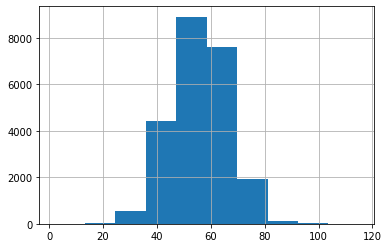

In [88]:
#строим диаграмму
df_2['living_ratio'].hist() 

Мы видим, что в таблице присутствуют значения, которые превышают 100%, а этого не может быть, поскольку жилая площадь не может быть больше общей - конкретизируем размеры диаграммы.

Сделаем срез и посмотрим, есть в таблице квартиры, общая площадь которых меньше суммы жилой и кухонной площадей.

In [89]:
#делаем срез аномальных значений
df_2[['living_area', 'kitchen_area', 'total_area']].query('living_area + kitchen_area > total_area')


,living_area,kitchen_area,total_area
259,43,35,73
277,43,30,72
1313,27,21,42
7553,23,23,34
7615,20,6,25
...,...,...,...
23575,25,8,25
23576,25,8,25
23577,25,8,28
23578,25,8,27


У целых 130 квартир есть ошибка в указании площади. С чем это может быть связано? Есть предположение, что лица, размещающие объъявление о продаже немного "приврали", говоря о площади кухни и жилой площади. Поэтому можно слегка уменьшить значения столбцев `kitchen_area` и `living_area` в случае, если их сумма превышает `total_area`

In [90]:
#создадим столбец, в который поместим разность суммы площадей kitchen_area и living_area и total_area
df_2['difference'] = (df_2['kitchen_area'] + df_2['living_area']) - df_2['total_area']

Создадим собственную функцию, которая будет проверять больше ли разность 0 или нет. Если разность больше 0, то сумма кухонной и жилой площадей больше общей, и тогда мы вычитаем из площади кухни половину (1/2) разницы. Если же разница меньше или равно 0, что общая площадь не меньше совокупности кухонной и жилой площадей, и в этом случае мы выводим значения столбца kitchen_area без изменений. 

Такой же алкгоритм сделаем и для жилой площади. Получится, что мы сравняем общую площадь и сумму кухонных и жилых площадей. Такие рассчеты, конечно, не учитывают площадь санузла и иных комнат, которые, как правило, находятся в квартире, но такая замена аномальных значений наиболе логичной и менее масштабной. Такие изменения не приведут к тому, что данные потеряют свои свойства.

Конечно, можно было бы удалить эти 130 строк, но тогда мы потеряем данные из других столбцев. Поэтому подкорректируем данные.

In [91]:
#создадим собственную функцию для корректирования значений kitchen_area
def filtr_area1(row):
    if row['difference'] > 0:
        return row['kitchen_area'] - ((row['difference'])/2)
    else:
        return row['kitchen_area']

In [92]:
#применяем собственную функцию
df_2['kitchen_area'] =df_2.apply(filtr_area1, axis = 1)

In [93]:
#создадим собственную функцию для корректирования значений living_area
def filtr_area2(row):
    if row['difference'] > 0:
        return row['living_area'] - ((row['difference'])/2)
    else:
        return row['living_area']

In [94]:
#применяем собственную функцию
df_2['living_area'] =df_2.apply(filtr_area2, axis = 1)

Проверим результат наших операций

In [95]:
#заменяем тип данных, поскольку при делении он сбился
df_2[['living_area', 'kitchen_area']] = df_2[['living_area', 'kitchen_area']].astype('int')
#делаем срез аномальных значений
df_2[['living_area', 'kitchen_area', 'total_area']].query('living_area + kitchen_area > total_area')


,living_area,kitchen_area,total_area


In [96]:
#удалим ненужные теперь столбцы
df_2 = df_2.drop('difference', axis=1)

Теперь можно работать с данными столбцами. Повторим расчет соотношения. Аномальных значений больше нет.

In [97]:
#соотношение жилой площади к общей площади
df_2['living_ratio'] = ((df_2['living_area'] / df_2['total_area'])*100).astype('int')
#соотношение кухонной площади к общей площади
df_2['kitchen_ratio'] = ((df_2['kitchen_area'] / df_2['total_area'])*100).astype('int')

**Итог**

Мы рассчитали соотношение жилой и кухонной площадей к общей плоащади и избавились от значений, которые превышали 100%, поскольку сумма частей общей площади быть выше, чем сама общая площадь.

**Вывод**

Посмотрим на полученную таблицу.

In [98]:
df_2

,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,living_area,floor,floors_total,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_meter,weekday,month,year,category_floor,living_ratio,kitchen_ratio
0,13000,108,2019-03-07,3,2,51,8,16,25,санкт-петербург,16028,16,120,3,3,2019,другой,47,23
1,12500,104,2019-04-22,3,2,53,2,13,20,санкт-петербург,15214,16,120,0,4,2019,другой,50,19
2,17000,124,2019-03-26,4,2,54,5,7,40,санкт-петербург,9771,18,137,1,3,2019,другой,43,32
3,10500,100,2019-03-22,3,2,51,4,4,20,санкт-петербург,10500,16,105,4,3,2019,последний,51,20
4,7100,100,2019-03-18,3,2,54,6,16,14,санкт-петербург,22066,16,71,0,3,2019,другой,54,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23583,6100,77,2019-02-28,4,2,5,1,9,9,санкт-петербург,11270,33,79,3,2,2019,первый,6,11
23584,850,78,2017-05-04,3,2,12,7,9,8,гатчина,0,169,10,3,5,2017,другой,15,10
23585,14400,100,2015-09-24,1,2,16,1,5,43,санкт-петербург,14931,451,144,3,9,2015,первый,16,43
23586,1800,117,2016-02-18,5,2,23,2,4,12,санкт-петербург,5238,139,15,3,2,2016,другой,19,10


* Мы рассчитали цену за 1 квадратный метр для каждой квартиры и добавили полученные значения в столбец price_meter

* Мы рассчитали день недели, месяц и год публикации объявления о продаже квартиры и поместили эти значения в столбцы weekday, month, year соответственно

* Мы рассчитали категорию этажа для каждой квартиры - первый, последний или другой

* Мы рассчитали соотношение жилой площади к общей и кухонной площади к общей для каждой квартиры.

## Исследовательский анализ данных

### Изучение параметров и построение гистограмм

#### Изучим площадь

Изучим такой параметр, как площадь квартиры.

In [99]:
#получим общую информацию об общей площади квартир
df_2['total_area'].describe()

count    23588.000000
mean        59.991903
std         35.082304
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        631.000000
Name: total_area, dtype: float64

Среднее выше медианы - в таблице есть хвост с большими значениями, от которых желательно избавиться. Мы видим, что минимальная площадь квартиры из датасета составляет 12 квадратных метров, а максимальная - 631 квадратный метр. И это очень интересно, поскольку 75% квартир имеют площадь менее 70 квадратных метров. Этот скачек в значениях подтверждает наличие в данных выбросов. Стандартное отклонение довольно велико.

Построим гистограмму для общей площади квартир

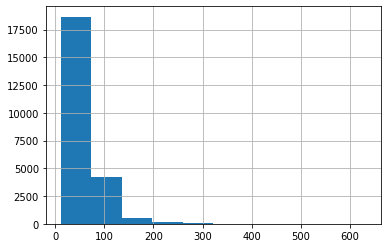

In [100]:
#строим гистограмму
df_2['total_area'].hist() 

Гистограмма выглядит странно и какие-то выводы по ней сделать сложно. Большинство квартир располагается в промежутке от 0 до 70 квадратных метров. Квартир с площадью от 70 до 120 квадратных метров заметно меньше. А квартир с площадью свыше 150 квадратных метров очень мало. 

Однако подобная гистограмма не дает точного представления о распределении. Детализируем гистограмму и увеличим количество корзин.

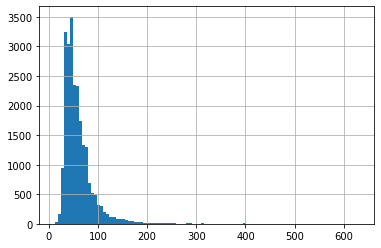

In [101]:
#строим гистограмму, указав количество корзин
df_2['total_area'].hist(bins = 100) 

Гистограмма все еще выглядит странно и несимметрично. Начиная со 100 квадратных метров идут немногочисленные значения, похожие на вбросы. Поработаем с масштабом и посмотрим на распределение квартир с аномально большой площадью от 200 м2 до 450 м2

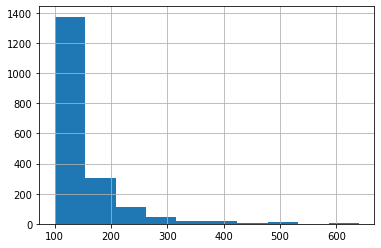

In [102]:
#увеличим масштаб гистограммы и посмотрим, как выглядит распределение квартир с площадью от 250 м2 до 450 м2
df_2['total_area'].hist(range = (100, 640)) 

На гистограмме видны выбросы, от которых нам лучше избавиться, поскольку в правдивость таких данных верится с трудом. Квартира размером с 6 соток?

А теперь посмотрим на аномальное небольшие площади

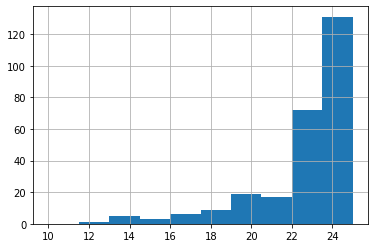

In [103]:
#увеличим масштаб гистограммы и посмотрим, как выглядит распределение квартир с площадью от 10 м2 до 25м2
df_2['total_area'].hist(range = (10, 25)) 

Исключим слишком большие и слишком маленькие площади и посмотрим на остальные. 

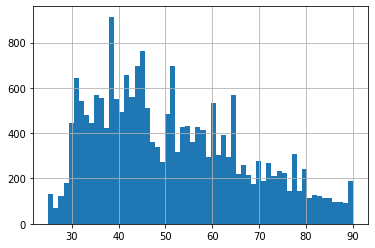

In [104]:
#первоначальная гистограмма без выбросов
df_2['total_area'].hist(range = (25,90),bins =60) 

Мы исключили часть аномально больших и маленьких площадей.
В таблице было много небольших квартир площадь, которых не превышает более 60 квадратных метров и есть небольшое количество очень больших значений, которые во много раз превышают средние показатели. Именно поэтому мы и получили среднее 59 квадратных метров.

Чтобы избавиться от выбросов построим диаграмму разамаха

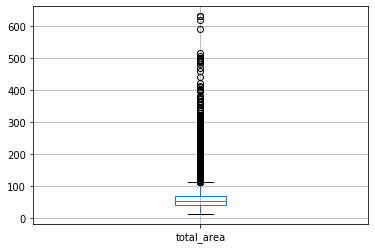

In [105]:
#строим диаграмму размаха
df_2[['total_area']].boxplot()

Не очень наглядно. Видно, что есть выбросы, и все свыше 100 квадратных метров, однако на этом всё. Чтобы лучше разглядеть «ящик с усами», изменим масштаб графика.

(10, 120)

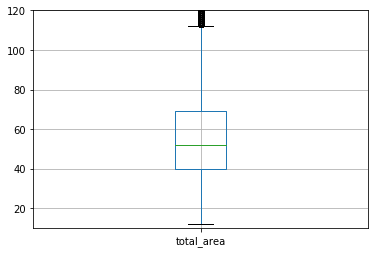

In [106]:
#масштабируем диаграмму размаха
import matplotlib.pyplot as plt 
df_2[['total_area']].boxplot()
plt.ylim(10, 120)


Большая часть значений лежит в диапазоне до 100 квадратных метров. Но при этом первый квартиль лежит на уровне 40 квадратных метров.

Нижний «ус» упирается в 11, минимальное значение. Верхний заканчивается около 100 квадратных метров — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.
И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.


Прокатегоризируем данные для построения графика, чтобы убедиться в наличии выбросов.

In [107]:
def filtr_area(row):
    if row < 20:
        return 'до 20м2'    
    if 20 < row < 40:
        return 'до 40м2'
    elif 40 < row < 90:
        return 'до 90м2'    
    elif 90 < row < 150:
        return 'до 150м2' 
    elif 150 < row < 200:
        return 'до 200м2' 
    elif 200 < row < 300:
        return 'до 300м2' 
    elif 300 < row < 400:
        return 'до 400м2' 
    elif 400 < row < 500:
        return 'до 500м2'     
    elif 500 < row < 600:
        return 'до 600м2'
    elif 600 < row < 650:
        return 'до 650м2'

In [108]:
#применяем функцию, сохраняя результат во вспомогательный столбец
df_2['new'] = df_2['total_area'].apply(filtr_area)


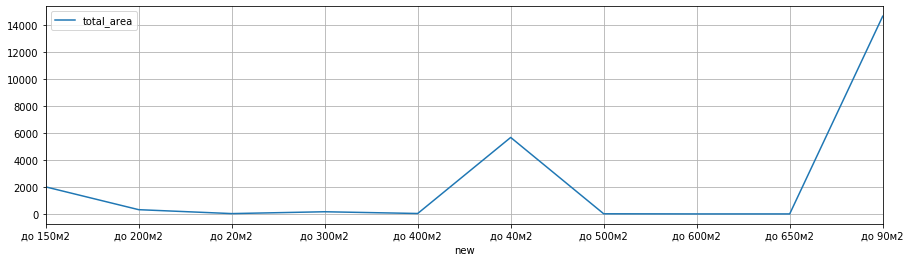

In [109]:
#строим график по категориям
df_pivot = df_2.pivot_table(index='new', values='total_area', aggfunc = 'count').plot(grid=True, figsize=(15, 4))

Мы видим, что абсолютное большинство квартир имеют площадь от 20 до 100 м2 (видны пики). Количество же квартир с другими площадями настолько невелико, что линия графика практически сливается с 0.

Теперь отсортируем таблицу по возрастанию, чтобы подтвердить слова

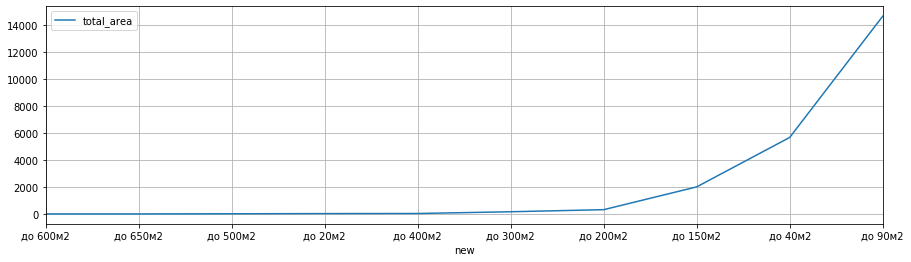

In [110]:
#строим график по категориям
df_pivot = df_2.pivot_table(index='new', values='total_area', aggfunc = 'count').sort_values(by = "total_area").plot(grid=True, figsize=(15, 4))

Мы видим, что квартиры с площадью ниже 20 м2 и выше 100 м2 настолько редки, что на графике они с трудом поднимаются выше нулевой отметки. Количество квартир с площадью ниже 20 м2 и выше 100 м2 исчисляются в единицах, что подвтержается слиянием графика с нулем в данных точках. 

In [111]:
#удалим ненужные теперь столбцы
df_2 = df_2.drop('new', axis=1)

Сохраним таблицу, удалив большую часть выбросов, установив нижнюю границу в 20м2 и верхнюю в 100м2. Сделаем мы это, руководствуясь таблицей размаха и квартилями. Однако сначала посчитаем, какой процент составляют квартиры с площадью до 20м2 и свыше 100 м2.

In [112]:
#считаем процент выбросов
len(df_2.query('20 <= total_area <= 90'))/len(df_2['total_area'])

0.889816856028489

12% это значительно, но зато наши данные станут чище! Удаляем выбросы

In [113]:
#таблица без большей части выбросов
good_df = df_2.query('20 <= total_area <= 100')

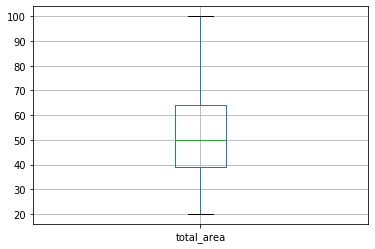

In [114]:
#строим диаграмму размаха
good_df[['total_area']].boxplot()

Теперь мы избавились от выбросов - красота!

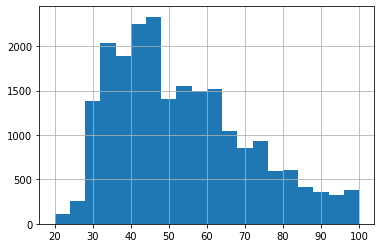

In [115]:
#строим диаграмму 
good_df['total_area'].hist(bins = 20) 

Хвост аномально больших значений укоротился и теперь мы видим, что большинство квартир имеют плоащадь 45 квадратных метров

In [116]:
#получаем общую информацию
good_df['total_area'].describe()

count    21783.000000
mean        52.794014
std         17.592599
min         20.000000
25%         39.000000
50%         50.000000
75%         64.000000
max        100.000000
Name: total_area, dtype: float64

Мы видим, что удаление выбросов сказалось поизитивно на нашем датасете - медиана и среднее устремились навстречу друг к другу. Средняя площадь равна 52м2, а медианная - 50м2. Они не сильно различаются, что приводит к выводу о том, что мы не зря избавились от выбросов. Стандартное отклонение в 17 м2 в сравнении с первоначальными 35м2 кажется неплохим результатом.

Теперь проанализируем соотношение площадей.

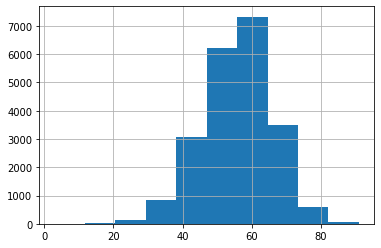

In [117]:
#строим гистаграмму жилой площади
good_df['living_ratio'].hist() 

Мы видим, что большинство квартир имеют жилую площадь которая составляет около 55-65% от общей площади квартиры. Меньше всего квартир с жилой площадью, составляющей менее 20% общей площади и более 80% общей площади. Следовательно, оптимальное соотношение жилой площади от квартиры - половина всей площади квартиры.

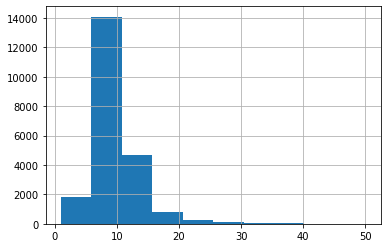

In [118]:
#строим гистаграмму кухонной площади
good_df['kitchen_area'].hist() 

Для получения более точных результатов изменим размер гистограммы

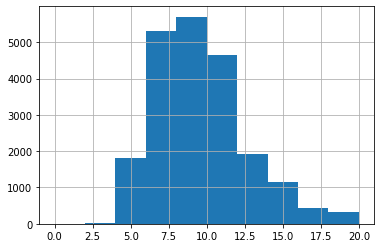

In [119]:
#строим гистаграмму кухонной площади с размерами от 0 до 20 м2
good_df['kitchen_area'].hist(range = (0, 20)) 

Мы видим, что большинство квартир имеют кухонную площадь, которая составляет 7-12% от общей площади. Меньше всего квартир с кухонной площадью более 20% и менее 3% от общей. Слишком большая кухня - редкость, как и слишком маленькая.

**Вывод**

Мы изучили такой параметр квартиры как ее площадь, избавились от подозрительных квартиры с очень высокой и очень низкой площадью. Построили графики для этого параметра. Узнали, какое соотношение площади кухни и жилой площади от общей наиболее распространено среди всех объявлений.

#### Изучим цену

Изучим такой параметр, как цена квартиры.

In [120]:
#получим общую информацию об стоимости квартиры
good_df['last_price_1000'].describe()

count    21783.000000
mean      5097.904559
std       2992.731014
min        430.000000
25%       3330.000000
50%       4450.000000
75%       6100.000000
max      53000.000000
Name: last_price_1000, dtype: float64

Мы видим, что цены квартир очень сильно разнится. Минимальная цена квартиры - 430 тысяч, а максимальная - целых 53 миллиона. Построим гистограмму, чтобы разобраться в том, как распределена цена квартир.
Средняя цена квартиры равна 5 миллионов, а медианная - 4,5 миллиона. Вероятно, удаление выбросов площадей повлияло и на цены, поскольку среднее и медианное довольно близки.
Стандартное отклонение довольно велико и примерно равно одной квартире.

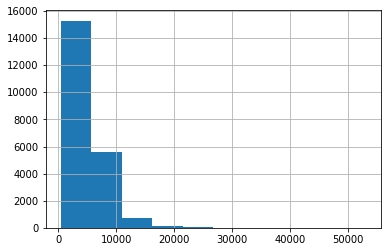

In [121]:
#строим гистограмму
good_df['last_price_1000'].hist() 

Замечательно! Квартиры с ценой выше 100 миллионо практически не встречаются. Добавим параметр bins со значением 100, чтобы гистограмма стала понятнее

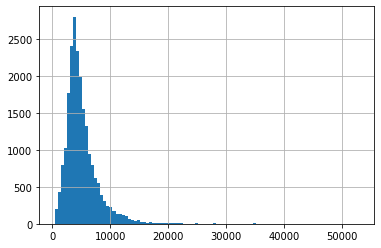

In [122]:
#строим гистограмму
good_df['last_price_1000'].hist(bins =100) 

Понятнее не стало - укрупняем!

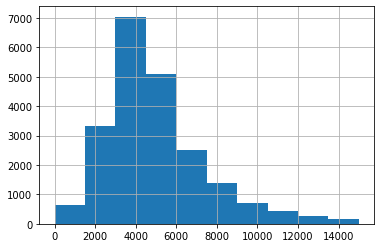

In [123]:
#строим гистограмму
good_df['last_price_1000'].hist(range = (0, 15000))

Большинство квартир стоят от 2 миллионов до 6 миллионов

Мы видим, что квартиры, которые стоят выше 15 миллионов настолько редки, что столбики практически сливаются с 0.

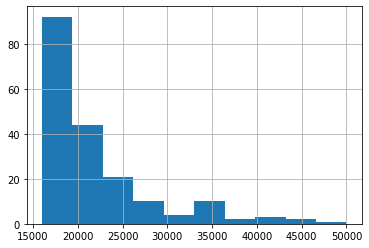

In [124]:
#строим гистограмму
good_df['last_price_1000'].hist(range = (16000, 50000), bins =10)

На гистограмме видны выбросы. Стоимость выше 20 миллионов для квартиры кажется слишком большой


Теперь посмотрим аномально низкие цены на квартиры

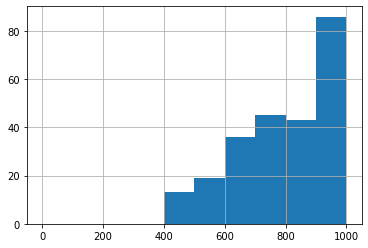

In [125]:
#строим гистограмму
good_df['last_price_1000'].hist(range = (0, 1000))

Мы нашли аномально маленькие выбросы.

Чтобы избавиться от выбросов построим диаграмму разамаха

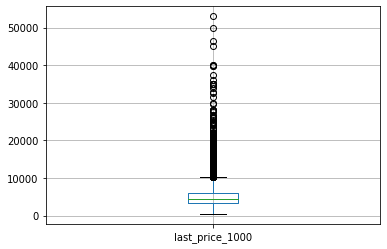

In [126]:
#строим диаграмму размаха
good_df[['last_price_1000']].boxplot()

Не очень наглядно.Но видно, что есть выбросы, и все свыше 50 миллионов, однако на этом всё. Чтобы лучше разглядеть «ящик с усами», изменим масштаб графика.

(10, 12500)

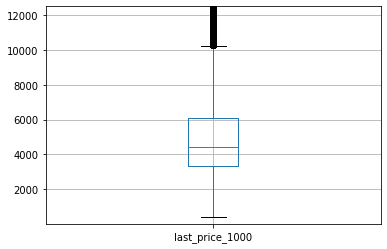

In [127]:
#масштабируем диаграмму размаха
import matplotlib.pyplot as plt 
good_df[['last_price_1000']].boxplot()
plt.ylim(10, 12500)


Большая часть значений лежит в диапазоне до 7 миллионов. Но при этом первый квартиль лежит на уровне 3,5 миллионов.
Нижний «ус» упирается в 12 тысяч, минимальное значение. Верхний заканчивается около 10 миллионах — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.
И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

Прокатегоризируем данные для построения графика, чтобы убедиться в наличии выбросов.

In [128]:
#создаем собственную функцию
def filtr_price(row):
    if row < 500:
        return 'до 500'    
    if 500 < row < 1000:
        return '1000'
    if 1000 < row < 2000:
        return '2000'
    if 2000 < row < 4000:
        return '4000'
    elif 4000 < row < 8000:
        return '8000'    
    elif 8000 < row < 10000:
        return '10000' 
    elif 15000 < row < 20000:
        return '20000' 
    elif 20000 < row < 30000:
        return '30000' 
    elif 30000 < row < 40000:
        return '40000' 
    elif row > 40000:
        return 'от 40000'     

In [129]:
#применяем функцию, сохраняя результат во вспомогательный столбец
good_df['new'] = good_df['last_price_1000'].apply(filtr_price)


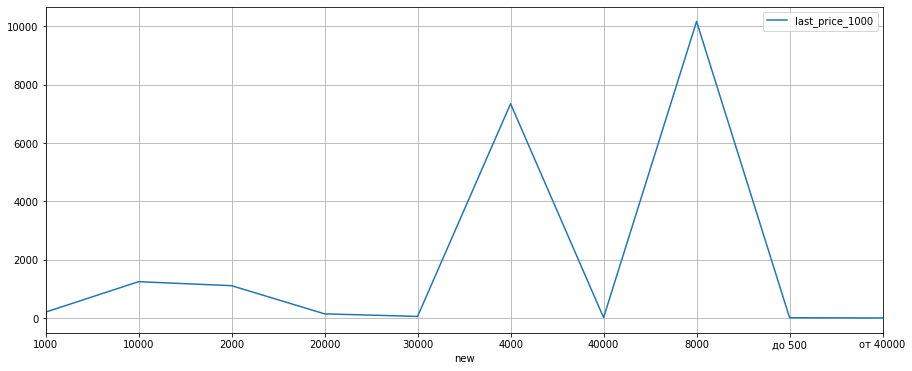

In [130]:
#строим график
df_pivot = good_df.pivot_table(index='new', values='last_price_1000', aggfunc = 'count').plot(grid=True, figsize=(15, 6))

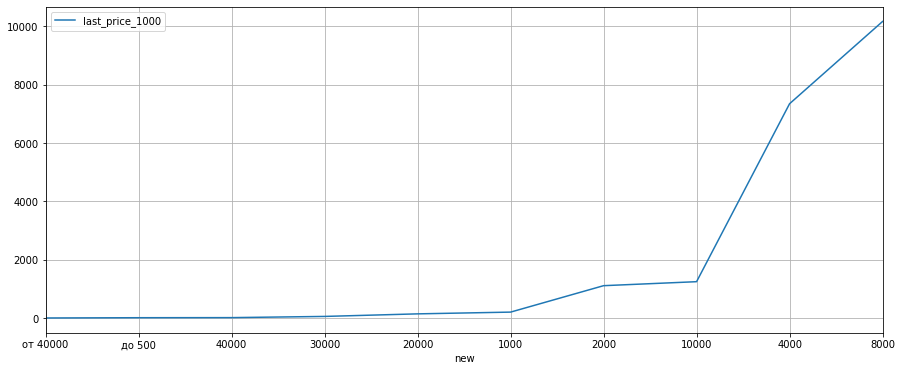

In [131]:
#строим график
df_pivot = good_df.pivot_table(index='new', values='last_price_1000', aggfunc = 'count').sort_values(by = "last_price_1000").plot(grid=True, figsize=(15, 6))

Мы видим, что квартиры с ценой от 10 миллионов и до 1 миллиона практически не встречаются.

In [132]:
#удалим ненужные теперь столбцы
good_df= good_df.drop('new', axis=1)

Сохраним таблицу, удалив большую часть выбросов, установив нижнюю границу в 1 миллион тысяч и верхнюю в 10 миллионов. Но для начала проверим, какой процент занимают выбросы.

In [133]:
#считаем процент выбросов
len(df_2.query('1000 <= last_price_1000 <= 10000'))/len(df_2['total_area'])

0.8765897914193658

Выбросы составляют 13%, но удалив их мы сделаем наши данные чище, а результаты исследования точнее

In [134]:
#таблица без большей части выбросов
good_df_2 = good_df.query('1000 <= last_price_1000 <= 10000')

Также проанализируем, какая цена квадратного метра является наиболее распространенной среди всех квартир

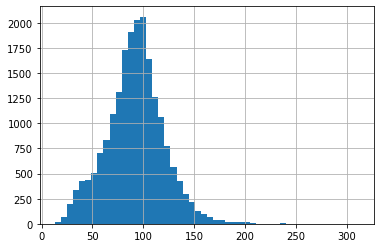

In [135]:
#строим гистограмму
good_df_2['price_meter'].hist(bins =50) 

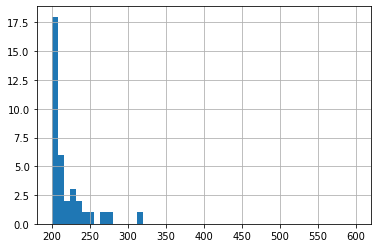

In [136]:
#строим гистограмму
good_df_2['price_meter'].hist(range=(200,600),bins =50) 

(0, 200)

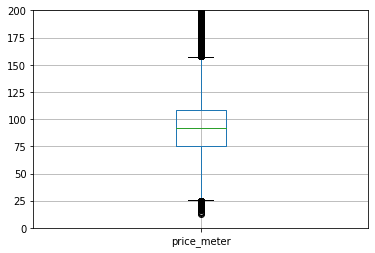

In [137]:
#масштабируем диаграмму размаха
import matplotlib.pyplot as plt 
good_df_2[['price_meter']].boxplot()
plt.ylim(0, 200)


Мы также нашли аномально большие значения и аномально небольшие значения, от которых надо избавиться.

In [138]:
#таблица без большей части выбросов
good_df_2 = good_df_2.query('25 <= price_meter <= 160')

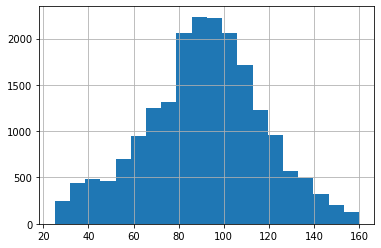

In [139]:
#строим гистограмму
good_df_2['price_meter'].hist(bins =20) 

Мы видим, что чаще всего 1 квадратный метр стоит в диапазоне от 80 тысяч до 100 тысяч. Теперь посмотрим на гистограмму общей цену квартиры

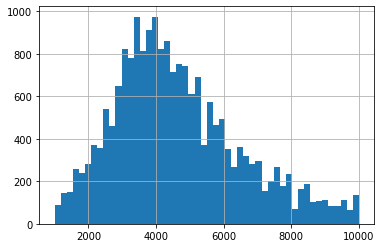

In [140]:
#строим гистограмму
good_df_2['last_price_1000'].hist(bins = 50)

Мы видим, что чаще всего квартиры стоят от 3,5 миллионов до 4,5 миллионов.

In [141]:
#получим общую информацию о числе комнат
good_df_2['last_price_1000'].describe()

count    20038.000000
mean      4626.568520
std       1866.446384
min       1000.000000
25%       3300.000000
50%       4300.000000
75%       5700.000000
max      10000.000000
Name: last_price_1000, dtype: float64

Средняя и медианная стоимость квартиры стали значительно ближе друг к другу: средняя - 4,7 миллионов, а медианная - 4,3 миллиона. В таблице все еще присутствуют аномально большие значения, которые утягивают цену вверх, но их стало значительно меньше. Удалить их можно, но тогда мы потеряем значительный объем данных.

Посмотрим, где самые дорогие квартиры

In [142]:
#строим сводную таблицу
stat = good_df_2.pivot_table(index ='locality_name', values = 'last_price_1000', aggfunc = 'median').sort_values(by = 'last_price_1000', ascending =False)

In [143]:
#выводим первые 5 строк
stat.head()

,last_price_1000
locality_name,
сестрорецк,5100.0
санкт-петербург,4960.0
пушкин,4900.0
репино,4800.0
глинка,4700.0


Сестрорецк	оказался очень дорогим городом, но возможно это из-за оставшихся выбросов.

Интересно, а где самый дорогой квадратный метр?

In [144]:
#строим сводную таблицу
stat = good_df_2.pivot_table(index ='locality_name', values = 'price_meter', aggfunc = 'median').sort_values(by = 'price_meter', ascending =False)
#выводим первые 5 строк
stat.head()

,price_meter
locality_name,
санкт-петербург,101.0
сестрорецк,99.0
зеленогорск,98.5
пушкин,98.0
левашово,97.0


Питер победил в этой схватке.

**Вывод**

Мы изучили такой параметр как цена квартиры. Нашли в датасете выбросы и избавились от них. Нашли среднее и медианное значение данного параметра. Выяснили, какова наиболее распространенная стоимость квартир и стоимость одного квадратного метра. Также мы узнали, где самые дорогие квартиры и самый дорогой квадратный метр.

#### Изучим число комнат

Изучим такой параметр как число комнат

In [145]:
#получим общую информацию о числе комнат
good_df_2['rooms'].describe()

count    20038.000000
mean         1.883471
std          0.866462
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Мы видим, что стандартное отклоенение в данном случае невелико - квартиры как правило отличаются друг от другой на 1 комнату.
Минимальное количество комнат в квартире - 0, что уже дает повод задуматься о выбросах, максимальное же количество комнат 6, при том, что у 75% квартир чисо комнат не превышает 4, что тоже наталкивает на мысли о выбросах. 
Среднее и медианное значение практически одинаковы и составляют 2 комнаты (это говорит о хвостах с правой и левой сторон от нормального распределения)

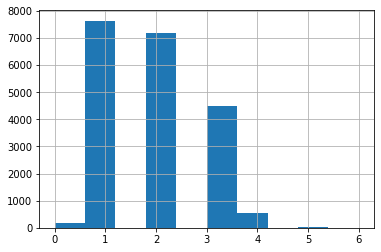

In [146]:
#строим гистограмму
good_df_2['rooms'].hist() 

Мы видим, что количество квартир с числом комнат выше 4 практически равно 0. Но также не может быть и 0 комнат у квартиры.

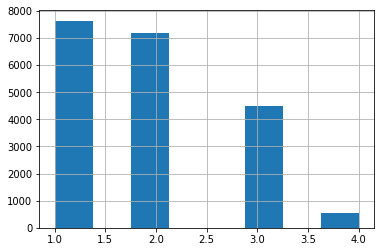

In [147]:
#строим гистограмму
good_df_2['rooms'].hist(range = (1, 4), bins =8)

Увеличим площадь для большего числа комнат

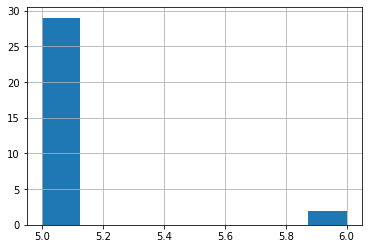

In [148]:
good_df_2['rooms'].hist(range = (5, 6), bins =8)

Вот и выбросы на лицо. Построим диаграмму разамаха, чтобы избавиться от них.

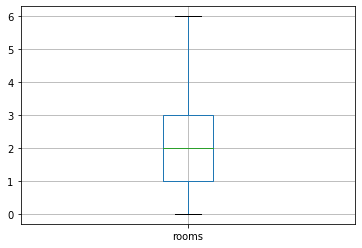

In [149]:
#строим диаграмму размаха
good_df_2[['rooms']].boxplot()

Первый квартиль лежит на уровне 1 комнаты. Нижний «ус» упирается в 0 комнат, минимальное значение. Верхний заканчивается на 6 комнатах — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Медиана равна 2. Выбросов не наблюдается. Значит, все-таки есть квартиры с 6 комнатами.

In [150]:
#таблица без большей части выбросов
good_df_3 = good_df_2.query('rooms >0')

Теперь можно посмотреть, что получилось.

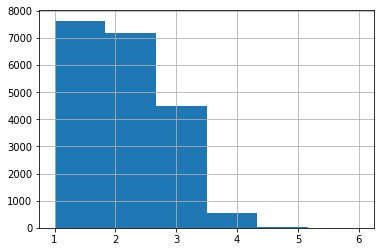

In [151]:
#строим гистограмму
good_df_3['rooms'].hist(bins = 6)

Мы видим, что больше всего в датасете квартир с 1-2 комнатами. Меньше же всего объявлений о продаже квартир с 5 и 6 комнатами, что в принципе логично объясняется небольшим количеством таких квартир в общем.

In [152]:
#получим общую информацию о числе комнат
good_df_3['rooms'].describe()

count    19856.000000
mean         1.900735
std          0.851365
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Среднее и медианное остались на прежнем уровне (2 комнаты). Видимо, устранение выбросов на прошлых этапах устранило их заодно и на этом, что положительно сказывается на резульатах. Стандартное отклонение также приемлемо.

**Вывод**

Мы изучили такой параметр как число комнат. Избавились от выбросов, нашли среднее и медианное число квартир, а также вычислили квартир с каким количеством комнат больше.

#### Изучим высоту потолков

Изучим такой параметр как высота потолков. Напомню, что она у нас округлена до целых частей. Поэтому выоста 2 и 3 м для потолков соответствует где-то 2,6 и 3,6 м.

In [153]:
#получим общую информацию о числе комнат
good_df_3['ceiling_height'].describe()

count    19856.000000
mean         2.094380
std          0.817004
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         32.000000
Name: ceiling_height, dtype: float64

Что мы видим?

Средняя и медианная высота потолков очень похожи друг на друга, что означает то, что если и выбросы есть, то они немногочисленны. Стандартное отклонение в метр тоже не сильно пугает, но минимальное и максимальное значения внушают ужас. Минимальная высота потолков - 1 метр? Однозначно это выброс. Максимальная высота потолков в 32 метра при условии, что 75% квартир имеют выосоту потолков 2 метра, тоже не внушает доверия. 

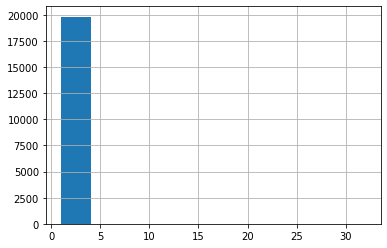

In [154]:
#строим гистограмму
good_df_3['ceiling_height'].hist() 

Понятно, что ничего не понятно. Мы видим, что высота потолков расположена в диапазоне от 0 до 5 метров. Поиграем с масштабом.

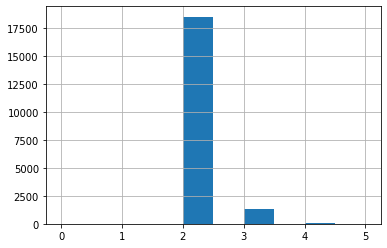

In [155]:
#строим гистограмму
good_df_3['ceiling_height'].hist(range = (0, 5), bins =10)

Мы видим, что наиболее часто встречающаяся высота потолков - 2 метра, следом идет 3 метра, и совсем редки случаи с высотой потолков выше 3 метров.

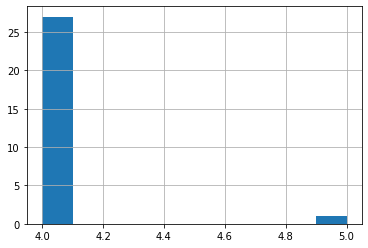

In [156]:
#строим гистограмму
good_df_3['ceiling_height'].hist(range = (4, 5), bins =10)

Гипотеза подтвердилась. Высота потолков выше 4 метров встречается крайне мало. Посмотрим на аномально высокие и низкие потолки.

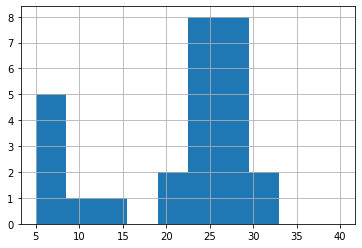

In [157]:
#строим гистограмму для аномально высоких потолков
good_df_3['ceiling_height'].hist(range = (5, 40), bins =10)

Вот вам и выбросы. Теперь смотрим на низкие потолки

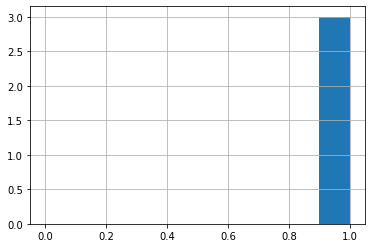

In [158]:
#строим гистограмму для аномально низких потолков
good_df_3['ceiling_height'].hist(range = (0, 1) )

Всего 3 квартиры, которые имеют такие низкие потолки. Построим диаграмму размаха, чтобы убедиться в своих словах.

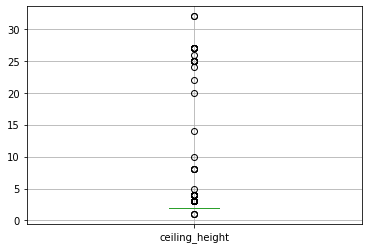

In [159]:
#строим диаграмму размаха
good_df_3[['ceiling_height']].boxplot()

Не очень наглядно. Но видно, что есть выбросы, и все свыше 5 метров, минимальная высота потолков равна 1, однако на этом всё. Чтобы лучше разглядеть «ящик с усами», изменим масштаб графика.

(1, 5)

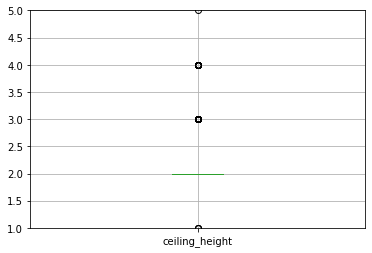

In [160]:
#масштабируем диаграмму размаха
import matplotlib.pyplot as plt 
good_df_3[['ceiling_height']].boxplot()
plt.ylim(1, 5)


Медианная высота потолка равна 2. Судя по всему, ориентировочная граница нормального размаха заключается в пределах от 1 до 3. Всё, что лежит за ней, считается выбросом. Выбросы видны как с высоких, так и с низких потолков.

Для наглядности выбросов построим график

Так, мы поняли, что высота потолков от 4 метров - выброс, поскольку их настолько мало, что гистограмма сливается с нулем в этих местах. Для конкретизация места выбросов посчитаем количество уникальных значений в данном столбце, чтобы понять предеы начала выбросов.

In [161]:
#считаем количество уникальных значений
good_df_3['ceiling_height'].value_counts()

2     18503
3      1296
4        27
27        7
25        7
8         4
1         3
32        2
14        1
26        1
10        1
24        1
22        1
5         1
20        1
Name: ceiling_height, dtype: int64

Мы видим, что квартир с высотой потолков от 4 метров настолько мало, что они с трудом в совокупность составляют 1% от общего числа квартир. От них можно избавиться.

In [162]:
#таблица без большей части выбросов
good_df_4 = good_df_3.query('1 < ceiling_height < 4')

Теперь построим график по отредактированной таблице

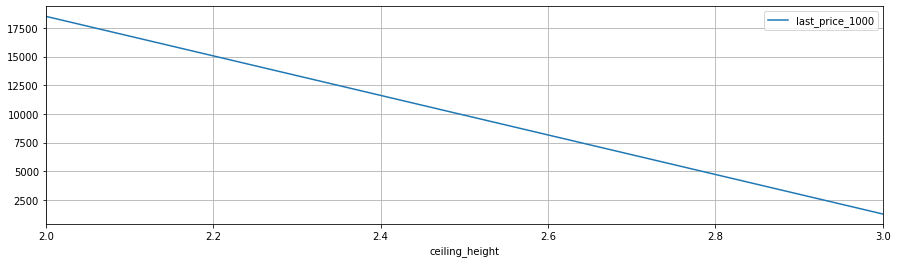

In [163]:
#строим график
df_pivot = good_df_4.pivot_table(index='ceiling_height', values='last_price_1000', aggfunc = 'count').plot(grid=True, figsize=(15, 4))

Мы видим, что чаще всего встречаются квартиры с высотой потолков 2 метра, а затем прослеживаем закономерность - чем выше потолок, тем меньше квартир с такой высотой. Построим гистограмму.

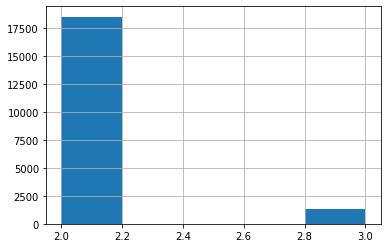

In [164]:
#строим гистограмму
good_df_4['ceiling_height'].hist(bins =5)

Наиболее часто встречающиеся квартиры - квартиры с высотой потолков 2 метра. Практически в 10 раз реже встречаются квартиры с высотой потолков 3 метра.

In [165]:
#получим общую информацию о числе комнат
good_df_4['ceiling_height'].describe()

count    19799.000000
mean         2.065458
std          0.247338
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: ceiling_height, dtype: float64

Средняя высота потолков и медиана все также практически равны и составляют 2 метра. Выбросы были устранены. Стандартное отклонение практически равно 0, что намекает на однородность представленных в датасете значений.

**Вывод**

Мы изучили такой параметр как высота потолков. Избавились от выбросов, нашли среднюю и медианную высоту потолков, а также вычислили квартир с какой высотой потолков больше.

### Выполняем задания

#### Изучим время продажи квартиры.

Нам предстоит сделать следующее:
построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Ответить, когда можно считать, что продажи прошли очень быстро, а когда необычно долго? Убрать редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Временем продажи квартиры можно считать количество дней размещения объявления, поскольку его снимают как правило в случае продажи. Необходимые для нас данные расположены в столбце `days_exposition`. В данном столбце находится информация о том, сколько дней продавалась квартира.

Выведем информацию об этом столбце с помощью метода `describe()`

In [166]:
#получим общую информацию о числе комнат
good_df_4['days_exposition'].describe()

count    19799.000000
mean       156.569019
std        200.473637
min          1.000000
25%         37.000000
50%         76.000000
75%        192.000000
max       1580.000000
Name: days_exposition, dtype: float64

Мы видим, что минимальное время продажи составляет **1 день**, в то время как максимальное время составляет **1580 дней** или же 4,5 года. Кому-то нужно сменить риэлтора. 

Среднее время продажи квартиры составляет **156 дней**, а медианное время - **76 дней**, что в 2 раза меньше среднего. Это означает, что в таблице есть аномально большие значения. Это подтверждается и тем, что согласно полученной информации около 75% квартир продавались за менее, чем 200 дней, но максимум составляет 4 года. Значит, в таблице есть как минимум 25% аномально больших значений, которые искажают данные.

Построим гистограмму, чтобы убедиться в этом.

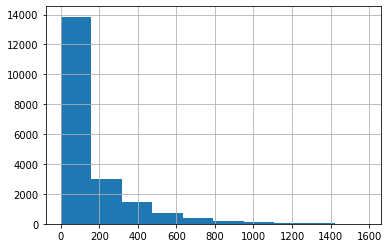

In [167]:
#строим гистограмму
good_df_4['days_exposition'].hist()

Так, мы видим, что большинство квартир продавались за период от 1 до 200 дней. Заметно меньше квартир было продано за период о 200 до 600 дней. Свыше 600 дней квартиры редко продавались.

Поменяем масштаб диаграммы для того, чтобы нагляднее изучить данные.

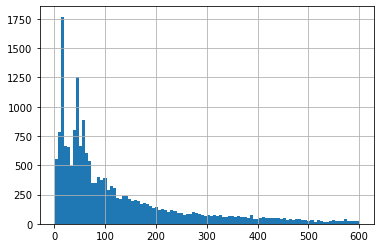

In [168]:
#строим гистограмму
good_df_4['days_exposition'].hist(range = (1,600), bins =100)

Изучим данные о квартирах, проданных за 1-100 дней (наибольшее количество квартир было продано в этом диапазоне).

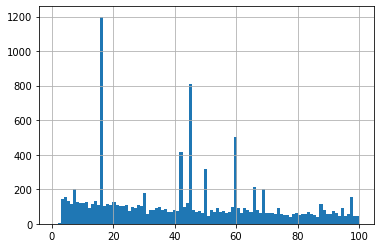

In [169]:
#строим гистограмму
good_df_4['days_exposition'].hist(range = (1,100), bins =100)

Мы видим пики, расположенные от 1 до 20 дней, от 40 до 60.

Изучим аномально большие значения, которые образуют хвост. Аномальными кажутся квартиры, которые продаются больше 400 дней, согласно диаграмме размаха.

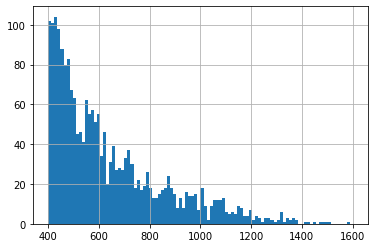

In [170]:
#строим гистограмму
good_df_4['days_exposition'].hist(range = (400,1600), bins = 100)

Мы видим, что квартиры, продающиеся более года все-таки есть, но их не так много.

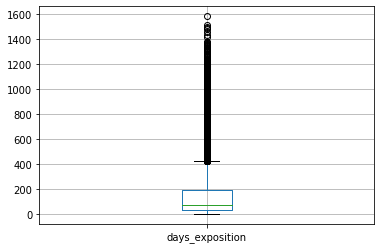

In [171]:
#строим диаграмму размаха
good_df_4[['days_exposition']].boxplot()

Не очень наглядно. Но видно, что есть выбросы, и все свыше 400 дней, минимальное время продажи равно 1, однако на этом всё. Чтобы лучше разглядеть «ящик с усами», изменим масштаб графика.

(0, 500)

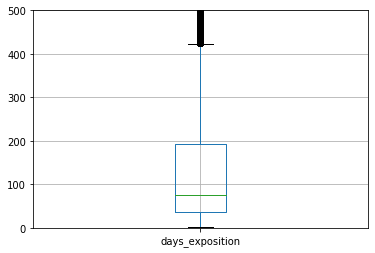

In [172]:
#масштабируем диаграмму размаха
import matplotlib.pyplot as plt 
good_df_4[['days_exposition']].boxplot()
plt.ylim(0, 500)


Большая часть значений лежит в диапазоне 200 дней. Но при этом первый квартиль лежит на уровне около 39 дней.
Нижний «ус» упирается в 1 день, минимальное значение. Верхний заканчивается около 450 дней — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.
И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

Кажется очень странным, что квартира может продаваться больше года. Возьмем за верхнюю границу 400 дней, поскольку большая часть значений лежит именно в это диапазоне.

Посчитаем долю квартир, проданных за период свыше 400 дней.

In [173]:
#считаем процент выбросов
(len(good_df_4.query('days_exposition < 400')) / len(good_df_4))*100

89.46916510934896

Количество квартир, которые продавались свыше 400 дней составляет целых 11% от общего числа квартир, что довольно много, но нам необходимо избавиться от выбросов. Посмотрим, как распределилось число таких квартир по населенным пунктам.

In [174]:
#проверим для скольки населенных пунктов характерно такое длительное время продажи
good_df_4['too_long'] = good_df_4['days_exposition']> 400
too_long_stat = good_df_4.pivot_table(index ='locality_name', values = 'too_long').sort_values(by = 'too_long', ascending =False)
too_long_stat.query('too_long >0.6')

,too_long
locality_name,
сумино,1.000000
большая пустомержа,1.000000
севастьяново,1.000000
суйда,1.000000
ваганово,0.666667
глажево,0.666667


Лишь для 6 населенных пунктов такие долгие продажи занимают довольно значимый процент ото всех. И для 4 из них такое время продажи является единственным, что означает, что они искажают данные, поскольку перетягивают среднее в болюшую сторону. Так, предполагается, что можно от них избавиться, как от выбросов. Среди них нет такого крупного города, как Питер, что свидетельствует о том, что данные значения можно удалить, поскольку они являются выбросами.

Так, мы нашли `сликшом долгие продажи` и поняли, что слишком долгой продажей является та, что длится более `400 дней`.

In [175]:
#считаем процент выбросов
good_df_5 = good_df_4.query('days_exposition < 400')

Теперь разберемся со слишком короткими продажами. Кажется весьма сомнительным, что кто-то мог бы купить квартиру за менее, чем 1 неделю.

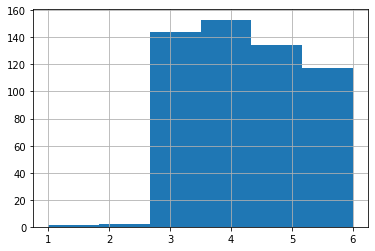

In [176]:
#строим гистограмму
good_df_5['days_exposition'].hist(range = (1,6), bins =6)

Действительно, за период с 1 по 6 дней в совокупность было продано немного квартир - возможно, эти объявления снимали не по причине продажи или они могли быть не соответсвующими действительности,. Можно считать эти значения выбросами и избавиться от них, но для начала посчитаем, сколько процентов составляют эти дни продажи от общего числа продаж.

In [177]:
#считаем процент выбросов
(len(good_df_5.query('days_exposition < 7')) / len(good_df_5))*100

3.1105340408716273

Всего 3% составляют квартиры, которые были проданы за менее чем 7 дня

Посмотрим, в каких городах находятся такие быстро распродающиеся квартиры.

In [178]:
#добавляем столбец со слишкой быстрой продажей
good_df_5['too_fast'] = good_df_4['days_exposition']<7
#строим сводную таблицу для населенных пунктов и процентом быстрых продаж и сортируем по убыванию процента
too_long_stat = good_df_5.pivot_table(index ='locality_name', values = 'too_fast').sort_values(by = 'too_fast', ascending =False)
#выводим первые 5 строк
too_long_stat.head()

,too_fast
locality_name,
агалатово,0.333333
старосиверская,0.333333
заводской,0.333333
новогорелово,0.250000
форносово,0.200000


Среди них нет такого крупного города, как Питер, что свидетельствует о том, что данные значения можно удалить, поскольку они являются выбросами.

Мы выяснили, что квартиры, которые были проданы менее, чем за `7 дней` являются `очень быстро проданными` и напоминают выбросы. Поэтому избавимся от них.

In [179]:
#удалим ненужные теперь столбцы
good_df_5 = good_df_5.drop(['too_long', 'too_fast'], axis=1)

In [180]:
#удаляем выбросы
good_df_5 = good_df_5.query('days_exposition > 7')

Теперь построим гистограмму и определим за какой период чаще всего продаются квартиры.

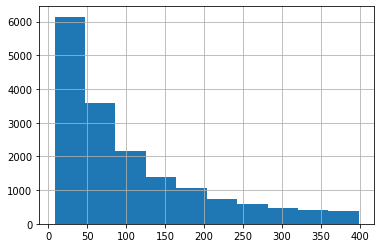

In [181]:
#строим гистограмму
good_df_5['days_exposition'].hist(bins = 10)

Мы видим, что все еще остался хвост с большими значениями, но количество этих больших значений очень велико, поэтому их нужно оставить. Увеличим масштаб, чтобы посмотреть на гистограмму подробнее.

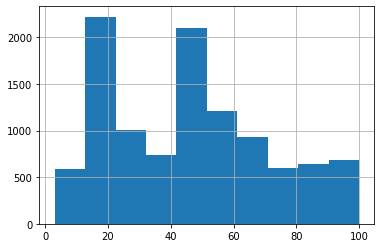

In [182]:
#строим гистограмму
good_df_5['days_exposition'].hist(range =(3,100), bins = 10)

Мы видим что больше всего квартир продается 16 до 21 дня с момента выставления объявления и от 41 до 50 дней с момента выставления объявления. Реже всего квартиры продавались по истечению 300 дней с момента продажи. 

In [183]:
#получим общую информацию о числе комнат
good_df_5['days_exposition'].describe()

count    16962.000000
mean       104.183941
std         93.388154
min          8.000000
25%         37.000000
50%         68.000000
75%        147.000000
max        399.000000
Name: days_exposition, dtype: float64

Среднее количество дней, которое необходимо для продажи составляет 104 дня, но это связано с тем, что появлялись квартиры, которые слишком долго продавались. Медианное же количество дней составляет 68 дней. Выбросы все-таки остались, но если от них избавиться, то мы потеряем огромную  часть данных. Учитывая то, что мы уменьшили в 1.5 раза среднее значение, а стандартное отклонение мы уменьшили в 2  раза, то можно сказать, что данные очищены успешно. Максимум же мы уменьшили в целых 4  раза!

Можно найти медианное время, необходимое для продажи квартиры для каждого города

In [184]:
#создаем сводную таблицу
stat = good_df_5.pivot_table(index ='locality_name', values = 'days_exposition').sort_values(by = 'days_exposition', ascending =False)
#выводим первые пять строк
stat.head(10)

,days_exposition
locality_name,
пушное,397.5
хапо-ое,390.0
борисова грива,386.0
шпаньково,379.0
пикалёво,360.0
дружноселье,355.0
каськово,346.0
сапёрное,324.5
жил,319.0


Мы видим, что в Коммунары, которые находятся на 10 месте по длительности продажи квартир, квартиры продаются на 79 дней быстрее, чем в Пушном, которое находится на 1 месте по длительности продаж. Это значит, что в датасете есть населенные пункты, в которых по неизвестным причинам очень долго продаеются квартиры, и поэтому они искажают данные. Однако теперь они все более похожи на однородный ряд.

Найдем Санкт-Петербург и узнаем, сколько дней нужно для продажи в этом городе квартиры.

In [185]:
#отдельно проверяем время продажи в Питере
stat[stat.index == 'санкт-петербург']

,days_exposition
locality_name,
санкт-петербург,102.688191


В Санкт-Петербурге на продажу квартиры требуется всего 102 дня.

**Вывод**

Мы изучили время продажи квартиры, приняв за данный параметр время размещения объявления. После этого мы построили гистограммы для данного показателя и диаграммы размаха, чтобы найти выбросы. Посчитали среднее и медиану с помощью метода describe. 
Проанализировав данные, пришли к выводу о том, что **необычно долго продаются квартиры свыше 400 дней**, а **слишком быстро продаются менее одной недели**. Мы устранили такие данные и нашли, сколько обычно продаются квартиры - наиболее частый результат составляет от 16 до 50 дней.


#### Изучим влияние различных параметров на стоимость квартиры.

Нам предстоит: 
Сначала выяснить, какие факторы больше всего влияют на стоимость квартиры (зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, размещения: дня недели, месяца и года), 

Затем нужно будет выбрать 10 населённых пунктов с наибольшим числом объявлений и  посчитать среднюю цену квадратного метра в этих населённых пунктах. 

И наконец необходимо выделить населённые пункты с самой высокой и низкой стоимостью жилья.

Построим матрицу диаграмм рассеяния, чтобы проследить зависимость цены от `количества комнат, площади и высоты потолков`. Мы специально поместим в отдельную таблицу лишь часть необходимых параметров для наглядности результатов и для того, чтобы не перегружать матрицу. Остальные параметры мы рассмотрм отдельно.

In [186]:
#создаем отдельный датасет
stat_df = good_df_5[['last_price_1000', 'total_area', 'rooms', 'ceiling_height']]

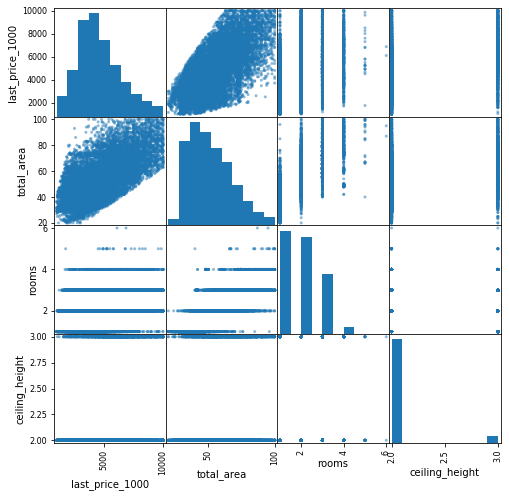

In [187]:
#строим матрицу диаграмм рассеяния
import matplotlib.pyplot as plt 
pd.plotting.scatter_matrix(stat_df, figsize=(8,8))
plt.show()

Также рассчитаем коэффициент корреляции Пирсона с помощью метода corr()

In [188]:
#считаем коэффициент корреляции Пирсона
stat_df.corr()

,last_price_1000,total_area,rooms,ceiling_height
last_price_1000,1.000000,0.685066,0.438731,0.245685
total_area,0.685066,1.000000,0.802014,0.196704
rooms,0.438731,0.802014,1.000000,0.112318
ceiling_height,0.245685,0.196704,0.112318,1.000000


1) Верхняя левая ячейка показывает нам связь цены с ценой. Это не диаграмма рассеяния, а обычная гистограмма распределения по цене. Видно, что больше всего квартир с ценой от 3 до 4,5 миллионов. Проверим догадку, посмотрев данную гистограмму детальнее.

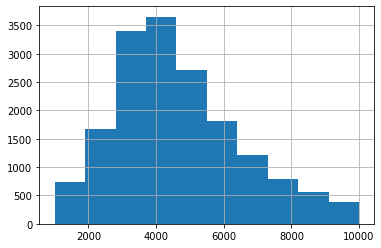

In [189]:
#строим гистограмму
good_df_5['last_price_1000'].hist()

Да, все так. Наши предположения верны.

**Промежуточный вывод:** больше всего квартир имеют цеу в пределах от 3 миллионов до 4,5 миллионов. Меньше же всего квартир с ценой выше 10 миллионов

2) Вторая слева в верхнем ряду диаграмма рассеяния показывает зависимость цены от площади. Мы можем точно сказать, что с увеличением площади растет и цена квартиры. Причем увеличение цены от площади происходит неравномерно - квартиры с одинаковой площадью могут иметь различные цены. Проверим нашу гипотезу.

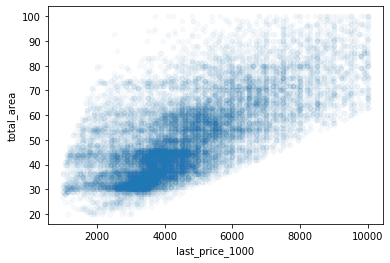

In [190]:
#строим диаграмму рассеяния
good_df_5.plot(x='last_price_1000', y='total_area', kind='scatter', alpha=0.03) 

Гипотеза подтвердилась. Цена растет в зависимости от площади и делает это не совсем равномерно. Однако можно отметить границу цены для каждой площади, ниже которой цена для определенной площади не опускается. Отметим ее красной линией.

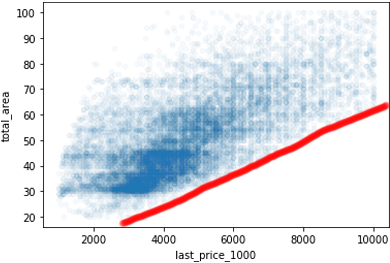

Мы видим, что цена растет в зависимости от площади и делает это не равномерно. Например, квартира с площадью 50 квадратных метров может стоить от 1,5 миллионов до 8 миллионов. Однако за пределы красной линии цена не уходит. Это объясняется тем, что мы удачно устранили выбросы, поэтому и цена и площадь теперь имеют некоторые пределы. 

Также мы видим, что очень много предложений  с пощадью от 30 до 50 квадратных метров и ценой от 2 до 6 миллионов рублей. Квартиры, которые подпадают под эти критерии, являются самыми продаваемыми. 

Также факт прямой пропорциональной зависимости цены от площади подтверждается и тем, что предложений квартир с площадью выше 75 квадратных метров по цене от 2 миллионов до 4 миллионов практически невозможно найти. Но по большей цене квартиры с такой площадью можно найти. Квартиры же с площадью от 20 до 30 квадратных метров никогда не превышают планки в 5.5 миллионов. 

**Коэффициент корреляции Пирсона** подтверждает наши мысли. `Корреляция в 0,685` говорит о наличии зависимости между площадью и ценой квартиры. Она, конечно, не самая сильная, но заметная!

**Промежуточный вывод:** цена квартиры прямо зависит от площади. В большинстве случаев, чем больше площадь квартиры, темы выше цена.

3) Третья слева в верхнем ряду диаграмма показывает зависимость цены квартиры от количества комнат. Предварительно можно сказать, что цена так или иначе зависит от количества комнат, но эта зависимость не такая явная, как в случае с площадью, и характерна в основном для отдельных этажей. Посмотрим подробнее на диаграмму.

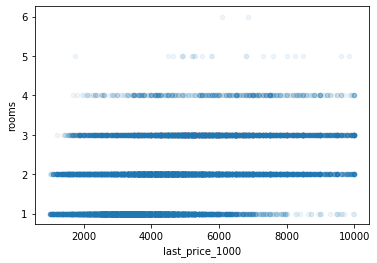

In [191]:
#строим диаграмму рассеяния
good_df_5.plot(x='last_price_1000', y='rooms', kind='scatter', alpha=0.07) 

Мы видим, что:
* Квартиры с одной комнатой крайне редко превышают стоимость в 8 миллионов. Цена квартир с одной комнатой - от 1 до 8 миллионов.
* Квартиры с двумя комнатами практически полностью расположились на ценовом интервале, однако после планки в 11 миллионов их становится заметно меньше, а также заметен небольшой проблеск в пределах от 1 миллиона до 1,3 миллиона. Значит, что квартиры с 2 комнатами могут стоить менее 1,3 миллионов и выше 11 миллионов, но это случается крайне редко. В основном цена квартир с 2 комнатами - от 1,3 миллионов до 11 миллионов.
* Квартиры с 3 комнатами уже более чувствительны к цене, нежели 2-ухкомнатные. Мы видим, что они редко стоят ниже 1,7 миллионов и намного чаще всех остальных стоят выше 10 миллионов. 3-ехкомнатные квартиры чаще всех остальных стоят в диапазоне от 10 до 12 миллионов.
* Квартиры с 4 комнатами чаще всего стоят в пределах от 3 миллионов до 8 миллионов. Встречаются и квартиры, выходящие за данные пределы, но они очень редки. Многие могли бы удивиться, почему 4-ехкомнатных квартир свыше 10 миллионов меньше, чем 3-ехкомнатных по такой же цене? Ответ прост - количество комнтат не всегда связано с площадью. На матрице мы видим, что площадь 3-комнатных квартир может быть выше площади 4-ехкомнатных.
* Квартиры с 5 и 6 комнатами настолько редки, что очень сложно судить о зависимости цены от и количества комнат. Однако можно сделать вывод о том, что, как правило их цена находится в середине ценового интервала и тяготит к более высоким ценам. Связано это, прежде всего с их площадью, поскольку на графике мы видим, что чаще всего такие квартиры имеют большую площадь. А, как мы уже выяснили, чем больше площадь, тем выше цена.

Мы пришли к выводу о том, что количество комнтат не всегда связано с площадью. Проверим наши предположения с помощью коэффициента корреляции.

**Коэффициент корреляции Пирсона** для числа комнат `равен 0,44`. В целом, можно говорит о наличии связи, однако не очень сильной. Выходит, увеличение комнат может сопровождаться ростом цены квартиры, но так бывает не всегда.

**Промежуточный вывод:** цена квартиры зависит от количества комнат, однако это не самая явная зависимость. Покупатель же в большинстве случаев выберет площадь, а не комнаты. 

4) Четвертая слева в верхнем ряду диаграмма показывает зависимость цены квартиры от высоты потолков. Предварительно можно сказать, что цена так или иначе зависит от количества комнат, но эта зависимость не такая явная и напоминает зависимость от количества комнат. Посмотрим подробнее на диаграмму.

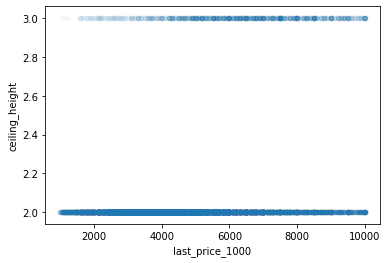

In [192]:
#строим диаграмму рассеяния
good_df_5.plot(x='last_price_1000', y='ceiling_height', kind='scatter', alpha=0.04) 

Что мы видим? А мы видим, что большинтсов квартир имеют потолки высотой **2 метра**. И точки, которыми обозначены квартиры с потолками в 2 метра настолько часто встречаются на любом ценомом интервале, что они сливаются в одну прямую и четкую линию, которая проходит вдоль всего интервала. Однако мы видим, что начиная от 10 миллионов таких квартир становится меньше. Однако кажется, что это связано с тем, что само количество квартир стоимостью свыше 10 миллионов меньше, чем остальных. Поэтому можно скзазать, что высота потолков 2 метра является стандартом для всех квартир и они могут иметь любую цену. Говоря о же **3-ехметровых** потолках, можно сказать, что квартиры с такими потолками являются более дорогими. Несмотря на общую немногочисленность таких квартир, можно сказать, что чаще всего они имеют цену от 4 до 7 миллионов. Цену выше имеют чуть меньшее количество квартир, а ниже - совсем мало.

**Коэффициент корреляции Пирсона** для высоты потолков  `равен 0,245`. В целом, можно сказать о наличии довольно слабой зависимости, которая проявляется лишь в 2 случаях из 10.

**Промежуточный вывод:** цена квартиры может зависеть от высоты потолков, но это очень слабая и редкая зависимость. Чаще всего цена квартиры не зависит от высоты полков, но в редких случаях (в 2 из 10) цена квартиры может складываться и из высоты потолков.

Теперь изучим цену квартиры от даты публикации объявления (дня недели, месяца и года). Начнем с `дня недели` опубликования объявления

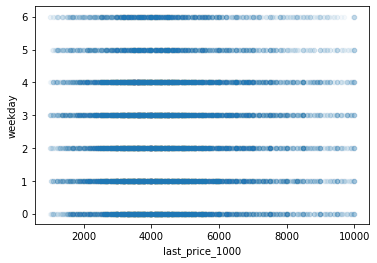

In [193]:
#строим диаграмму рассеяния для определения зависимости между днем недели ценой
good_df_5.plot(x='last_price_1000', y='weekday', kind='scatter', alpha=0.04) 

Что мы видим? Мы видим, что практически все квартиры продавались по цене, находящейся в одном и том же ценовом диапазоне, независимо от того, в какой день недели было размещено объявление. Различается лишь их количество. Проверим наши догадки с помощью сводных таблиц.

Проверим истинность наших догадок с помощью сводной таблицы, где мы сравним медианную цену продажи квартиры для каждого дня недели.

In [194]:
#строим сводную таблицу
good_df_5.pivot_table(index='weekday', values='last_price_1000', aggfunc = 'median').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
weekday,
5,4390
0,4350
2,4350
1,4300
3,4300
4,4300
6,4270


Чего и требовалось доказать - практически нет различия в цене в зависимости от дня недели. Медианная цена для каждого дня недели колебалась в пределах от 4-4,5 миллионов. В принципе цена никак и не может зависеть от дня недели, в который опубликовали объявление о продаже квартиры.

Сделаем то же самое со средней ценой.

In [195]:
#строим сводную таблицу
good_df_5.pivot_table(index='weekday', values='last_price_1000', aggfunc = 'mean').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
weekday,
2,4658.713523
0,4652.216503
4,4639.901076
1,4627.147803
5,4619.234463
3,4612.044786
6,4550.354150


Наши догадки все так же подтвердились - цена не зависит от дня недели публикации. Средние цены по дням недели практически не отличаются друг от друга.

In [196]:
#строим сводную таблицу
good_df_5.pivot_table(index='weekday', values='last_price_1000', aggfunc = 'count').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
weekday,
1,3004
3,2992
4,2881
2,2810
0,2642
5,1416
6,1217


А вот количество объявлений в различные дни недели неодинаково. Самый активный для продаж день недели - вторник. Выходные же - самые непопулярные дни для выставления объявления о продаже квартиры. 

Проверим наши догадки с помощью коэфициента корреляции

In [197]:
#считаем коэффициент корреляции
good_df_5['weekday'].corr(good_df_5['last_price_1000'])

-0.009443188591345443

Мы видим отрицательный коэффициент корреляции `(-0,009)`, но он настолько небольшой, что можно сказать о том, что зависимость полностью отсутствует.

**Промежуточный вывод:** цена квартиры не зависит от дня недели, в который было выставлено объявление о продаже.

Теперь проследим зависимость цены продажи квартиры `от года`, в которых было размещено это объявление. 

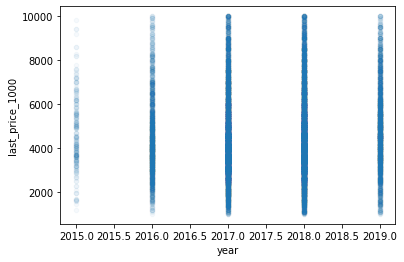

In [198]:
#строим диаграмму рассеяния
good_df_5.plot(x='year', y='last_price_1000', kind='scatter', alpha=0.04) 

Как и в случае с днями недели тут есть зависимость между количеством объявлений и годом публикации объявления, но не заметна зависимость между ценой и годом.

Мы видим, что в 2015 году в целом было выставлено на продажу мало квартир, а их цены редко превышали 8 миллионов. В 2016 году произошел резкий скачек к в количестве объявлений и в разнообразии цен на квартиры. Теперь ценовой интервал колеблется в пределах от 1,5 миллиона, до 8 миллинов, все что за пределами интервала - редкость. В 2017 году стало еще больше продаж, а ценовой интервал уже начианался от 1 миллиона и заканчивался 10 миллионами, что соответствует всему ценовому диапазону. Пиковым же по количеству объявлений является 2018 год, за который было выставлено больше всего объявлений о продаже, а ценовой диапазон квартир охватывал как минимальные, так и максимальные значения. В 2019 году заметен небольшой спад по количеству объявлений, и ценовой диапазон поэтому снизился с обоих краев диапазона, но в целом сохранился практически неизменным.
С чем связана такая зависимость. Скорее всего, в 2015 году сервис Яндекс-Недвижимость еще набирал обороты. Так же это был первый год после введения санкций, которые могли затормозить рынок недвижимости в стране. Однако постепенно сервис набирает обороты и достигает пика к 2018 году. В 2019 году заметен спад количества объявлений о продаже квартир, который можно связать с коронавирусной эпидемией, притормозившей рынок.

Проверим медианную цену для каждого года и количество объявлений, чтобы подтвердить наши предположения.

In [199]:
#строим сводную таблицу
good_df_5.pivot_table(index='year', values='last_price_1000', aggfunc = 'count').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
year,
2018,6842
2017,6072
2019,2222
2016,1584
2015,242


Мы видим, что в 2018 году было опубликовано намного больше заявлений,чем в остальные годы. Также и подтверждаются слова о снижении количества объявлений в 2019 году. В 2015 год же было опубликовано очень мало объявлений.

In [200]:
#строим сводную таблицу
good_df_5.pivot_table(index='year', values='last_price_1000', aggfunc ='median').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
year,
2019,4750
2015,4500
2018,4300
2016,4200
2017,4200


Как говорится - "Доверяй, но проверяй!". Проведем такие же махинации, но уже со средней ценой.

In [201]:
#строим сводную таблицу
good_df_5.pivot_table(index='year', values='last_price_1000', aggfunc ='mean').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
year,
2019,4946.039154
2015,4732.359504
2018,4614.176995
2016,4575.175505
2017,4541.320158


Средняя цена в зависимости от года публикации объявления колеблется в пределах от 4.5 до 4.9 миллионов. Кто-то может сказать, что тут есть зависимость, но аналитик скажет, что такая ситуация возникла из-за различия количества объявлений. Как раз-таки из-за того, что в некоторые годы было опубликовано много объявлений с различными ценами (как с маленькими, так и большими), а в другие - сравнительно меньше объявлений (в основном с высокими или средними ценами), и появилась такая разница в средние цены.

Говоря же о медианных ценах, мы видим, что они все-таки изменяются в зависимости от года опубликования заявления, но стоит сразу сказать, что объявление о продаже квартиры может быть опубликовано с одной ценой в один год, а продана она может быть на следущий год с абсолютно иной ценой.

Не будем делать поспешные выводы и проверим наши догадки с помощью коэффициента корреляции

In [202]:
#считаем коэффициент корреляции
good_df_5['year'].corr(good_df_5['last_price_1000'])

0.04797361306873712

Коэффициент `(0,047)` настолько мал, что можно смело сказать, что цена квартиры не зависит от года публикации. Наши предположения подтвердились. Зависимость есть, но она проявляется в 4 случаях из 100, что можно свести к 0. Изменение же цены объясняется иными факторами, в частности количеством.

**Промежуточный вывод:** цена квартиры не зависит от года публикации

Проверим, зависит ли цена квартиры `от месяца`, в который опубликовано объявление о ее продаже.

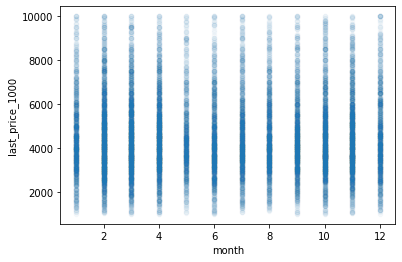

In [203]:
#строим диаграмму рассеяния
good_df_5.plot(x='month', y='last_price_1000', kind='scatter', alpha=0.03) 

На первый взгляд цена никак не щависит от месяца опубликования объявления о продаже - зависит только количество проданных квартир.

Чтобы подтвердить свои догадки построим сводные таблицы.

In [204]:
#строим сводную таблицу
good_df_5.pivot_table(index='month', values='last_price_1000', aggfunc ='count').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
month,
2,1965
3,1857
4,1717
11,1664
10,1565
9,1364
8,1263
6,1249
7,1214


Мы видим, что в разные месяца публикуется разное количество объявлений о продаже квартиры. Самым активным является февраль, а самым пассивным - май, в который в 2 раза меньше объявлений опубликовано, чем в февраль. Посмотрим, как различаются цены.

In [205]:
#строим сводную таблицу
good_df_5.pivot_table(index='month', values='last_price_1000', aggfunc ='median').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
month,
4,4500
11,4390
1,4350
3,4350
8,4350
12,4310
2,4300
7,4300
10,4300


В целом цены практически не различаются, что и подтверждает наша диаграмма рассеяности. Незначительные различия могут быть вызваны оставшимися выбросами или различием в количесве объявлений.

Проверим догадки с помощью средних цен.

In [206]:
#строим сводную таблицу
good_df_5.pivot_table(index='month', values='last_price_1000', aggfunc ='mean').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
month,
4,4696.023296
8,4668.059382
7,4649.613674
1,4647.828887
12,4644.637324
3,4641.570275
11,4641.313101
2,4625.882443
10,4625.539297


Самая большая средняя цена и самая маленькая средняя цена отличаются друг от друга примерно на 200 тысяч, что для квартиры кажется несущественным.

Проверим наши догадки с помощью коэффициента корреляции

In [207]:
#считаем коэффициент корреляции
good_df_5['month'].corr(good_df_5['last_price_1000'])

-0.0021588936405911984

Коэффициент `(-0,002)` настолько мал, что можно смело сказать, что цена квартиры не зависит от года публикации.

**Промежуточный вывод:** цена квартиры не зависит от месяца, в который было выставлено объявление о продаже.

Теперь надо узнать, зависит ли цена квартиры от ее `этажа (первого или последнего)`.

Однако построить диаграмму рассеяния у нас не получится, поскольку категория этажа у нас имеет тип object, однако мы можем присвоить целочисленные значения категориям - первый этаж будет 0, а последний 1.

In [208]:
#создаем датасет только для первых и последних этажей
good_df_floor = good_df_5.query('category_floor != "другой"')

In [209]:
#создаем собственную функцию
def flors(row):
    if row =='первый':
        return 0
    else:
        return 1

In [210]:
#применяем собственную функцию
good_df_floor['category'] = good_df_floor['category_floor'].apply(flors)

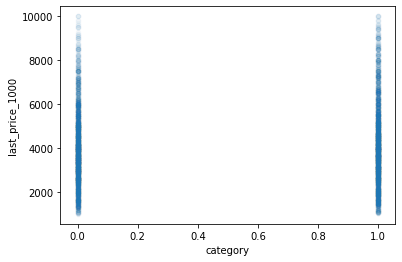

In [211]:
#строим диаграмму рассеяния
good_df_floor.plot(x='category', y='last_price_1000', kind='scatter', alpha=0.03) 

По диаграмме видно только то, что количество дорогих квартир с последним этажем больше, чем количество квартир с первым этажем. Построим сводную таблицу.

In [212]:
#строим сводную таблицу
good_df_5.pivot_table(index='category_floor', values='last_price_1000', aggfunc ='count').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
category_floor,
другой,12530
последний,2261
первый,2171


Мы видим, что покупатели чуть больше любят квартиры на последнем этаже, нежели на первом, но это настолько незначительная разница, что практически незаметна. Посмотрим, как выглядит медианная цена.

In [213]:
#строим сводную таблицу
good_df_5.pivot_table(index='category_floor', values='last_price_1000', aggfunc ='median').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
category_floor,
другой,4500
последний,3990
первый,3806


Да, видимо, квартиры на последнем этаже будут чуть более интересны покупателям, чем квартиры на первом. Опять же стоит повториться, разница тут крайне незначительная - в рамках медианной стоимости квартиры разница составляет 190 тысяч. Посмотрим на средние цены, а затем на то, что нам скажет об об этом коэффициент корреляции

In [214]:
#строим сводную таблицу
good_df_5.pivot_table(index='category_floor', values='last_price_1000', aggfunc ='mean').sort_values(by = 'last_price_1000', ascending = False)

,last_price_1000
category_floor,
другой,4792.452594
последний,4260.815568
первый,4073.868263


Средние цены различаются на 200 тысяч, что подтверждает выводы, сделанные при анализе медианной цены.

In [215]:
#считаем коэффициент корреляции
good_df_floor['category'].corr(good_df_floor['last_price_1000'])

0.051136790660194824

Коэффициент `(0,05)` очень мал, и можно смело сказать, что цена квартиры не зависит от года публикации.

**Промежуточный вывод:** цена квартиры не зависит от того, первый этаж у квартиры или последний. В 5 из 100 случаев лица будут руководствоваться при выборе квартиры критерием этажа.

Теперь проверим, зависит ли стоимость квартиры от `удаленности от центра`. Как мы помним, в некоторых населенных пунктах данный показатель равен 0, потому что не везде он измеряется. Кажется логичным и справедливым для чистоты исследования такие данные не брать при рассчете зависисмости.

In [216]:
#избавимся от неточностей
good_df_centr = good_df_5.query('city_centers_nearest != 0')

Теперь можно строить диаграмму рассеяния

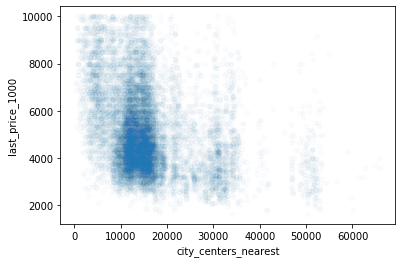

In [217]:
#строим диаграмму рассеяния
good_df_centr.plot(x='city_centers_nearest', y='last_price_1000', kind='scatter', alpha=0.02) 

Мы видим, что чем дальше квартира от центра, тем меньше ее цена. В частности, это подтверждается и тем, что на расстоянии от 0 до 10 км цены за квартиру очень редко опускаются ниже 4 миллионов и достигают пиковых значений - 12 миллионов. Самые дорогие квартиры расположены в основном на расстоянии до 15км от центра. Чем же дальше от центра, тем реже цена поднимается выше 6 миллионов. Для наглядности прочертим красной линией границы наиболее распространенных цен для каждого порогового расстояния до центра.

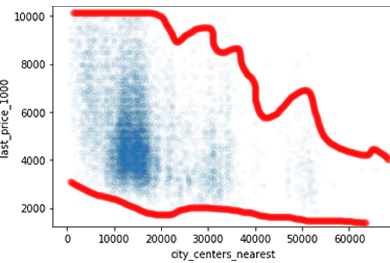

Значения за красной линией настолько редки, что практически сливаются с фоном. Теперь мы точно можем сказать, что чем ближе квартира к ценру, тем выше на нее цена. Больше всего квартир было продано на расстоянии от 10 до 20 км от центра по цене от 3 до 8 миллионов. Очень мало было продано квартир очень далеко от центра, даже не смотря на их заметную дешевизну. Мы видим, что цена квартир на растоянии 20 км от центра уже не превышает 9 миллионов, а квартиры на растоянии 50 км от центра очень редко стоят выше 7 миллионов. Рассчитаем коэффициент корреляции.

In [218]:
#считаем коэффициент корреляции
good_df_centr['city_centers_nearest'].corr(good_df_centr['last_price_1000'])

-0.32153796416386343

Обратный коэффициент корреляции равный -0,32 говорит о том, что существует зависимость между ценой квартиры и ее удаленностью от центра. Чем выше расстояние от центра, тем ниже цена.

**Промежуточный вывод:** цена квартиры зависит от растояния до центра - чем ближе к центру, тем дороже стоимость квартиры, и наоборот. Однако это не самая сильная зависимость. Связано это с тем, что по мере удаления от центра квартиры подвергаются большему влиянию иных факторов, а в частности площади.

И наконец, нам нужно выбрать `10 населённых пунктов с наибольшим числом объявлений` и  посчитать `среднюю цену квадратного метра` в этих населённых пунктах , а потом из них необходимо `выделить населённые пункты с самой высокой и низкой стоимостью жилья`. Искать дешевые и дорогие квадратные метры мы будем из данного списка(рейтинга) по причине того, что у населенных пунктов с небольшим количеством объявлений могут встречаться выбросы и аномально большие или маленькие значения.

В этом нам поможет сводная таблица. Одновременно применим к цене функции mean и count, затем переименуем столбцы и отсортируем данные по убыванию количества объявлений. И выведем на экран первые 10 строк таблицы. Используем данные стоимости одного квадратного метра и найдем среднее значение для каждого из этих 10 населенных пунктов.

In [219]:
#строим сводную таблицу
good_df_locality = good_df_5.pivot_table(index='locality_name', values='price_meter', aggfunc=['mean', 'count'])
#переименовываем столбцы
good_df_locality.columns = ['mean_price_meter', 'flat']
#сортируем таблицу по убыванию числа объявлений и сохраняем первые 10 строк
good_df_locality = good_df_locality.sort_values(by = 'flat', ascending = False).head(10)
#выводим таблицу на экран
good_df_locality

,mean_price_meter,flat
locality_name,,
санкт-петербург,103.262605,10670
мурино,86.081633,490
кудрово,95.164062,384
шушары,78.624339,378
всеволожск,66.761610,323
колпино,75.031359,287
пушкин,99.135231,281
парголово,89.937729,273
гатчина,69.225806,248


**Промежуточный вывод:**

Мы видим, что больше всего объявлений о продаже квартиры было опубликовано в Санкт-Петербруге - примерно в 20 раза больше, чем в населенном пункте, который по количеству опубликованных объявлений следует за Питером. 

В Санкт-Петербурге было опубликовано около 11 тысяч объявлений. Вторым по количеству опубликованных объявлений выступает Мурино с практически 490 проданными квартирами, и третий населенный пункт в данном рейтинге - это Кудрово и примерно 384 проданных квартиры. 

Мы видим колосальный перевес в пользу Санкт-Петербурга. Примерно половина всех проданых квартир приходятся на один населенный пункт.

Теперь посчитаем самые дорогие и самые дешевые квадратные метры.

In [220]:
#отсортируем таблицу по убыванию стоимости одного квадратного метра
good_df_locality.sort_values(by = 'mean_price_meter', ascending = False)

,mean_price_meter,flat
locality_name,,
санкт-петербург,103.262605,10670
пушкин,99.135231,281
кудрово,95.164062,384
парголово,89.937729,273
мурино,86.081633,490
шушары,78.624339,378
колпино,75.031359,287
гатчина,69.225806,248
всеволожск,66.761610,323


**Промежуточный вывод:**

Самый дорогой квадратный метр среди всех населенных пунктов данного рейтинга естествеено в Санкт-Петербурге - как-никак культурная столица России. Один квадратный метр в этом городе стоит в среднем около 103 тысяч. 

Следом, практически не отставая, за Санкт-Петербургом расположился Выборг со средней ценой за один квадратный метр - 99 тысяч.

Самыми же дешевыми стали квадратные метры в таких населенных пунктах, как Всевложск и Выборг. Во Всевложске вы отдадите в среднем за один квадратный метр 67 тысяч, а в Выборге всего 59 тысяч.

**Вывод**

Мы выполнили задание и:

1) Проследили зависимость цены квартиры от различных параметров:

* площадь квартиры (есть зависимость) 

* количество комнат (есть зависимость)

* высота потолков (есть слабая зависимость)

* дата публикации объявления (нет зависимости)

* этаж (нет зависимости)

* расстояние до центра (есть зависимость)

2) Нашли 10 населенных пунктов снаибольшим числом опубликованных объявлений о продаже квартиры. Пришли к выводу о том, что около половины всех проданых квартир приходятся на Санкт-Петербург.

3) Выяснили, что самые дорогие квадратные метры в Санкт-Петербурге среди 10 населенных пунктов, на которые пришелся наибольший процент продаж квартир. Также выяснили, что самые дешевые квадратные метры среди этих же 10 населенных пунктов в Выборге.

#### Выяснить, какая область входит в центр Санкт-Петербурга

Наша задача — выяснить, какая область входит в центр Санкт-Петербурга. Для этого мы создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [221]:
#создаем столбец с расстоянием до центра в километрах и округляем значения
good_df_5['centr_km'] = (good_df_5['city_centers_nearest']/1000).astype('int')

In [222]:
#создадим таблицу с данными о квартирах в санкт-петербурге
good_df_6 = good_df_5.query('locality_name == "санкт-петербург"')

Теперь посчитаем, как менялась средняя цена квартир в Санкт-Петербурге в зависимости от удаленности от центра.

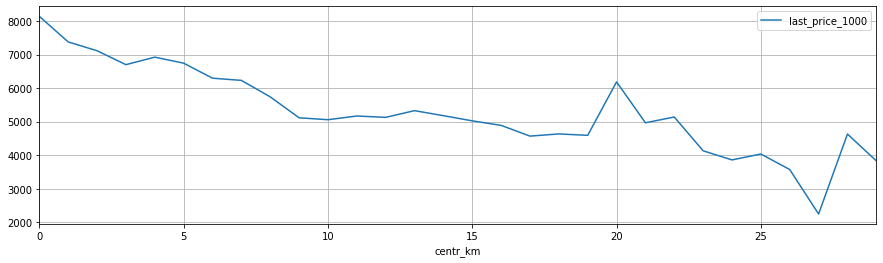

In [223]:
#строим график по километрам
df_pivot = good_df_6.pivot_table(index='centr_km', values='last_price_1000', aggfunc = 'mean').plot(grid=True, figsize=(15, 4))

Мы видим, как цена резко падает на расстоянии около 7 километров от центра, а затем идет более-менее ровно до тех пор, пока снова не снижается. Конечно, видны некоторые пики за границей 7 км, однако это может объясняться наличием коттеджных поселков.

Выдвигаем гипотезу о том, что область до 7 километров входит в центр Санкт-Петерубрга, поскольку именно в этой границе график цены резко меняется. Проверим нашу гипотезу создав столбец, в который мы поместим отношение цены квартиры к расстоянию до центра. Квартиры в центре должны иметь большие значения этого соотношения, потому что мы делим большую цену на небольшое значение расстояния до центра. Чем дальше от центра будет расположена квартира, тем меньше будет цена и соответсвенно больше будет растояние, что приведет к низким значениям отношения цены на растояние.

In [224]:
#строим столбец с отношением цены квартиры на ее расстояние до центра
good_df_6['sr_km'] = good_df_6['last_price_1000']/ good_df_6['centr_km']

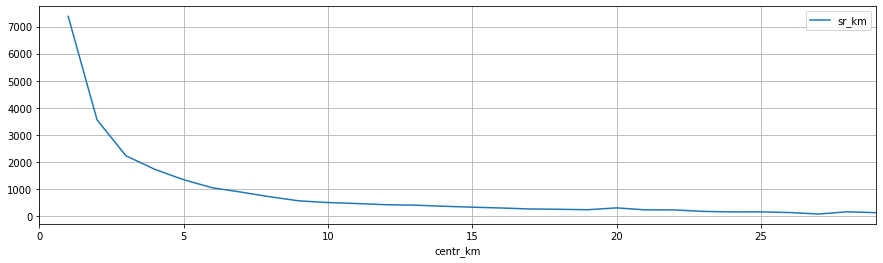

In [225]:
#строим график по отношению
df_pivot = good_df_6.pivot_table(index='centr_km', values='sr_km', aggfunc = 'mean').plot(grid=True, figsize=(15, 4))

Мы видим, что результаты деления резко меняются на границе 6-7 километров. Значит, гипотеза верна, и центр находится где-то в области 7 километров.

**Вывод**

Мы выделили квартиры в Санктр-Петербурге и создали столбец с расстоянием до центра города в километрах. После этого посчитали  среднюю цену для каждого километра с помощью сводных таблиц. Затем построили график, показывающий зависимость цены от удаленности от центра. Определили, что график очень сильно меняется на в области 7 километров. Выдвинули гипотезу о том, что центр находится именно в пределах этой области. 

Для подтверждения гипотезы построили столбец с отношением цены к расстоянию до центра, чтобы понять, где сильно и резко меняется это значение. Мы увидели на граффике резку смену в области 7 километров и подтвердили нашу гипотезу.

Центр Санкт-Петербурга находится в области `7 километров`.

####  Изучить центр Санкт-Петербурга

Нужно выделить сегмент квартир в центреи проанализировать эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).А затем сделать выводы о том, отличаются ли они от общих выводов по всему городу?

In [226]:
#создадим таблицу для центра Санкт-Петербурга
df_spb = good_df_6.query('centr_km <= 7')

Для наглядности также создадим таблицу для не центра Питера.

In [227]:
non_spb = good_df_6.query('centr_km > 7')

Изучим площадь квартир в Санкт-Петербурге.

In [228]:
#получаем общую информацию о столбце с плоащдью
df_spb['total_area'].describe()

count    1489.000000
mean       61.265279
std        17.870995
min        20.000000
25%        47.000000
50%        60.000000
75%        74.000000
max       100.000000
Name: total_area, dtype: float64

Мы видим, что минимальная площадь квартиры, которая продается в центре Санкт-Петербурга составляет 20 м2, в то время как максимальная - 100м2. Средняя же площадь квартиры в центре Санкт-Петербурга составляет 61м2, что примерно равно медианной плоащади (удаление выбросов помогло). Стандартное отклонение площади в 17м2 довольно незначительно. Посмотрим, какая площадь является наиболее распространенной для центра города - построим гистограмму.

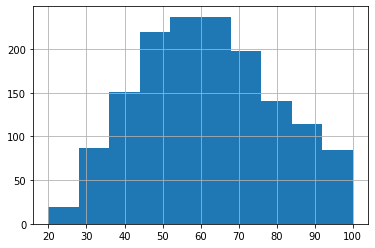

In [229]:
#строим гистограмму
df_spb['total_area'].hist()

Наиболее распространены в центре Санкт-Петербурга квартиры с площадью от 51 до 69 квадратных метров. Меньше всего в центре небольшх квартир площадью менее 30 м2. Посмотри теперь на соотношение жилой и кухонной площадей.

Посмотрим на соотношение с квартирами, находящимися за центром Питера.

Сравним центр с территорией за его пределами.

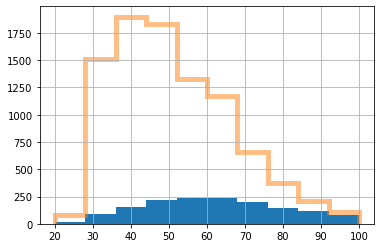

In [230]:
#строим гистограмму
df_spb['total_area'].hist()
non_spb['total_area'].hist(histtype='step', linewidth=5, alpha=0.5)

Мы видим, что квартиры в цза пределами центра чаще всего имеют площадь от 35 до 50 м2. Меньше всего же квартир с площадью менее 30 м2 и более 90м2. Заметны некоторые различия.

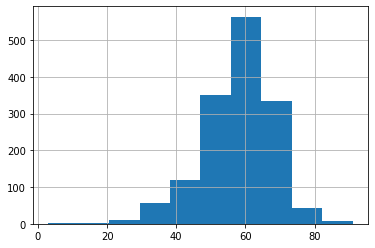

In [231]:
#строим гистограмму
df_spb['living_ratio'].hist()

Чаще всего в центре Санкт-Петербурга жилая площадь занимает от 55 до 65 процентов от жилой площади. Очень редки случаи, когда жилая площадь составляет менее 20% от общей площади.

Сравним центр с территорией за его пределами.

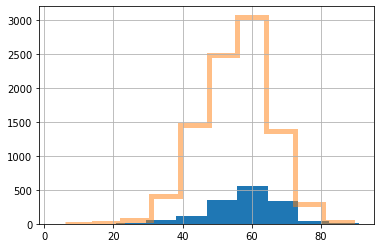

In [232]:
#строим гистограмму
df_spb['living_ratio'].hist()
non_spb['living_ratio'].hist(histtype='step', linewidth=5, alpha=0.5)

В центре и за его пределами ситуация с распределением жилой площади в целом практически одинакова.

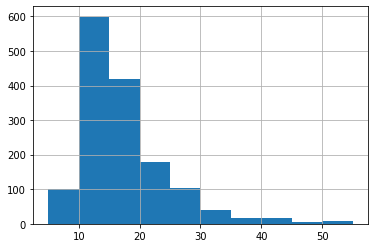

In [233]:
#строим гистограмму
df_spb['kitchen_ratio'].hist()

В центре Санкт-Петербурга кухонная площадь чаще всего составляет от 10 до 15 процентов от общей площади. Крайне редки случаи, когда кухонная площадь занимает свыше 30%.

Сравним центр с территорией за его пределами.

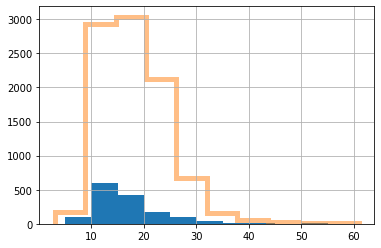

In [234]:
#строим гистограмму
df_spb['kitchen_ratio'].hist()
non_spb['kitchen_ratio'].hist(histtype='step', linewidth=5, alpha=0.5)

В центре и за его пределами ситуация с распределением кухонной площади в целом практически одинакова.

**Промежуточный вывод:**

Мы изучили площадь квартир в центре Питера и нашли наиболее и наименее часто встречающиеся площади. Так же мы проанализировали соотношение кухонных и жилых площадей с общей площадью. Было отмечено положительное влияние от удаления выбросов.

Теперь изучим цену квартир в центре Санкт-Петербурга.

In [235]:
#получаем общую информацию о столбце с ценой
df_spb['last_price_1000'].describe()

count     1489.000000
mean      6710.883143
std       1744.996846
min       2100.000000
25%       5400.000000
50%       6700.000000
75%       8000.000000
max      10000.000000
Name: last_price_1000, dtype: float64

Мы видим, что  минимальная цена квартиры, которая продается в центре Санкт-Петербурга составляет 2.1 миллиона, в то время как максимальная - все 10 миллионов. Средняя же цена квартиры в центре Санкт-Петербурга составляет 6,7 миллионов, что равно медианной плоащади (удаление выбросов помогло). Стандартное отклонение площади в 1,7 миллиона довольно незначительно. Посмотрим, какая цена является наиболее распространенной для центра города - построим гистограмму.

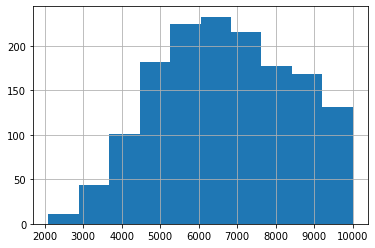

In [236]:
#строим гистограмму
df_spb['last_price_1000'].hist()

Мы видим, что квартиры в центре Санкт-Петербурга довольно дороги и чаще всего стоят от 5,5 до 7 миллионов. Крайне редко квартиры стоят менее 4 миллионов. Посмотрим на стоимость квадратного метра.

Сравним центр с территорией за его пределами.

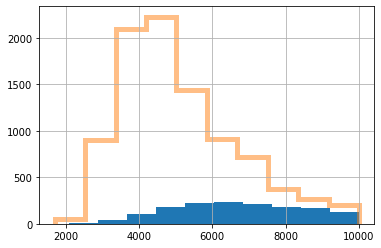

In [237]:
#строим гистограмму
df_spb['last_price_1000'].hist()
non_spb['last_price_1000'].hist(histtype='step', linewidth=5, alpha=0.5)

Мы видим, что цена квартир за центром Питера в среднем намного меньше, чем в центре. За центром квартиры в основном стоят от 3 миллионов до 5 миллионов.

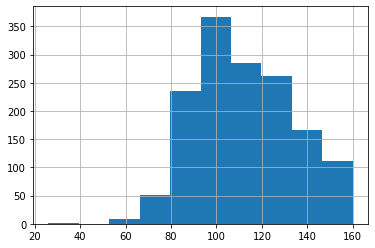

In [238]:
#строим гистограмму
df_spb['price_meter'].hist()

Квадратные метры очень дорогие в центре Санкт-Петербурга. Чаще всего квадратный метр стоит от 90 до 110 тысяч. Крайне редко один квадратный метр может стоить менее 80 квадратны метров.

Сравним центр с территорией за его пределами.

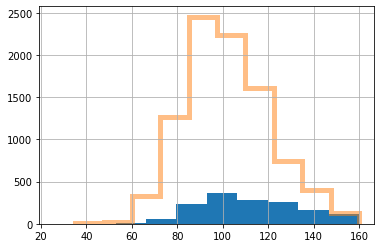

In [239]:
#строим гистограмму
df_spb['price_meter'].hist()
non_spb['price_meter'].hist(histtype='step', linewidth=5, alpha=0.5)

Цена одного квадратного метра за центром Питера у большей части квартир составляет от 82 до 97 тысяч, что поменьше, чем цена квадратного метра в центре. В целом ситуация по всему Питеру схожа - квадратные метры довольно дорогие.

**Промежуточный вывод:**

Мы изучили цены квартир в центре Питера и нашли наиболее и наименее часто встречающиеся ценовые интервалы. Также были изучен такой параметр, как цена квадратного метра. Было отмечено положительное влияние от удаления выбросов. Также мы посмотрели на то, как соотносится центр Питера и территория за его пределами.

Теперь изучим количество комнат в квартирах в центре Санкт-Петербурга.

In [240]:
#получаем общую информацию о столбце с плоащдью
df_spb['rooms'].describe()

count    1489.000000
mean        2.244459
std         0.857845
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

Мы видим, что  минимальное количество комнат в квартире, которая продается в центре Санкт-Петербурга составляет 1 комната, в то время как максимальное - 5 комнат. Среднее же количество комнатв квартире в центре Санкт-Петербурга составляет 2 комнаты, что равно медианному числу комнат. Стандартное отклонение практически нулевое. Посмотрим, квартиры с каким количеством комнат являются наиболее распространенными для центра города - построим гистограмму.

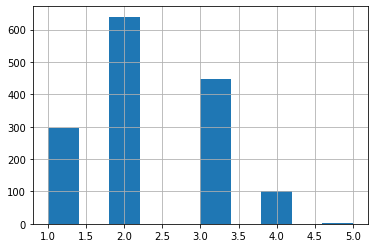

In [241]:
#строим гистограмму
df_spb['rooms'].hist()

В центре Питера очень много 2-ухкомнатных квартир. На втором месте по количеству идут 3-комнатные квартиры. Меньше же всего 4-ех и 5-комнатных квартир. В целом это характерно для всех населенных пунктов из датасета.

Сравним центр с территорией за его пределами.

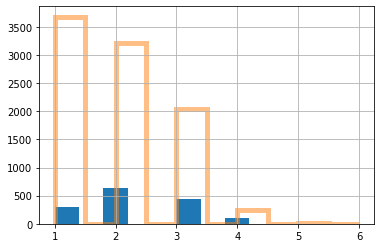

In [242]:
#строим гистограмму
df_spb['rooms'].hist()
non_spb['rooms'].hist(histtype='step', linewidth=5, alpha=0.5)

Если в центре популярны двушки и трешки, то за центром гораздо больший успех имеют однушки!

**Промежуточный вывод:**

Мы изучили количество комнат в квартирах в центре Питера и нашли наиболее и наименее часто встречающиеся показатели. 

Теперь изучим высоту потолков в квартирах в центре Санкт-Петербурга.

In [243]:
#получаем общую информацию о столбце с плоащдью
df_spb['ceiling_height'].describe()

count    1489.000000
mean        2.349899
std         0.477098
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: ceiling_height, dtype: float64

Мы видим, что  минимальная высота потолковв в квартире, которая продается в центре Санкт-Петербурга составляет 2 метра, в то время как максимальная - 3 метра. Средняя же высота как и медианная равна 2 метрам. Стандарное отколнение практически нулевое. Посмотрим, квартиры с какими потолками являются наиболее распространенными для центра города - построим гистограмму.

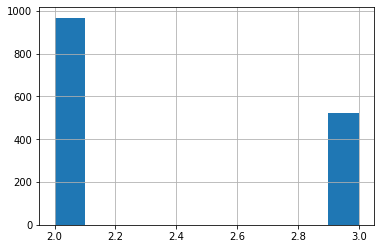

In [244]:
#строим гистограмму
df_spb['ceiling_height'].hist()

Как и по всем населенным пунктам квартиры с высотой потолков в 2 метра являются наиболее популярными у жителей центра Санкт-Петербурга. Высота потолков же в 3 метра встречается в 2 раза реже.

Сравним центр с территорией за его пределами.

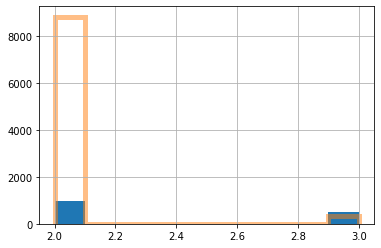

In [245]:
#строим гистограмму
df_spb['ceiling_height'].hist()
non_spb['ceiling_height'].hist(histtype='step', linewidth=5, alpha=0.5)

Мы видим, что как и в центре Питера, за центром Питера высота потолков 2 метра является общепринятым стандартом.

**Промежуточный вывод:**

Мы изучили высоту потолков в центре Питера и пришли к выводу, что данный показатель для центра очень схож для других населенных пунктов.

Теперь выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) и сравним реузльтаты с общими по всему городу?

Насколько я понял, "общие результаты по всему городу" - это результаты по всем населенным пунктам, которые мы уже поулчили ранее.

Снова построим собственную функцию для категоризации этажей и создадим датасет только с первым и последним этажем, а затем посчитаем коэффициент корреляции.

In [246]:
#создаем датасет без категории этажа "другой"
good_df_floor_spb = df_spb.query('category_floor != "другой"')
#создаем собственную функцию
def flors(row):
    if row =='первый':
        return 0
    else:
        return 1
#применяем собственную функцию
good_df_floor_spb['category'] = good_df_floor_spb['category_floor'].apply(flors)
#считаем коэффициент корреляции
good_df_floor_spb['category'].corr(good_df_floor_spb['last_price_1000'])

0.23710879529068926

Коээфициент корреляции для центра Санкт-Петербурга равен `0,2`, в то время как для всего города он был равен `0,05`. Это значит, что цена на квартиру для центра Питера зависит от того, на каком этаже находится квартира намного больше, чем для остальных населенных пунктов. 

**Промежуточный вывод:**

Корреляция между этажом квартиры и ее ценой в центре Питера отличается от общей - она сильнее, однако все такая же слабая. Примерно 2 из 10 покупателей обратят внимание на этаж при покупке квартиры в центре Питера.

Теперь проследим корреляцию между числом комнат, удаленностью от центра и датой размещения для центра Питера. Вынесем эти столбцы в отдельный датасет.

In [247]:
#создаем отдельный датасет
df_spb_2 = df_spb[['rooms', 'weekday','month','year', 'city_centers_nearest', 'last_price_1000']]

In [248]:
#считаем коэффициент корреляции Пирсона
df_spb_2.corr()

,rooms,weekday,month,year,city_centers_nearest,last_price_1000
rooms,1.000000,-0.002543,0.034144,-0.013763,-0.164283,0.496788
weekday,-0.002543,1.000000,0.024932,-0.019491,0.031864,0.042996
month,0.034144,0.024932,1.000000,-0.276615,-0.017021,-0.013296
year,-0.013763,-0.019491,-0.276615,1.000000,0.017146,0.071023
city_centers_nearest,-0.164283,0.031864,-0.017021,0.017146,1.000000,-0.190254
last_price_1000,0.496788,0.042996,-0.013296,0.071023,-0.190254,1.000000


**Промежуточный вывод:**

Коэффициент корреляции для количества комнат равен 0,5, что говорит о довольно ощутимой зависимости, не сильной, конечно, но явной. Значит, цена квартир в центре Питера зависит от количества комнат. Во всех же остальных населенных пунктах данный коэффициент был равен 0,4. Значит зависимость цены от количества комнат в центре Питера чуть выше.

Коэффициент корреляции для дня недели публикации равен 0,04, в то время как по всему городу в целом он был равен -0,009. Сказать, что зависимость в центре Питера цены квартиры от дня недели публикации выше, чем по городу в общем нельзя, поскольку оба этих значения крайне малы. Цена как не зависела от дня неделели опубликования объявления о продаже, так и не зависит

Коэффициент корреляции для месяца публикации равен -0,01, в то время как для города в целом данное значение равно -0,002. Как для центра Питера, так и для города в общем цена квартиры абсолютно не зависит от месяца опубликования объявления о продаже квартиры.

Коэффициент корреляции для года публицкации равен 0,07, в то время как по всему городу в целом он равен 0,047. Значения практически не отличаются друг от друга - цена квартиры в центре Питера, как и в других населенных пунктах не зависит от года опубликования объявления о продаже квартиры.


Коэффициент корреляции для расположения от центра равен -0,19, что значительно ниже, чем по городу в общем (-0,32). Но это вполне логично. Квартиры в центре стоят примерно одинаково дорого. И зависимость от дальности к центру снижается, поскольку данные квартиры уже считаются находящимися в центральной области.



**Вывод**

Мы изучили квартиры в центре Санкт-Петербурга и проанализировали отдельные параметры квартир:  кооличество комнат, высота потолков, площадь и цену. Существенным отличием данных квартир является довольно высокая цена. Также мы выяснили, от чего может зависеть цена в данной области и сравнили эту зависимость с выводами по всему городу.

## Общий вывод

В ходе исследования была проделана колоссальная работа!

1) Мы изучили данные и привели их в удобный для чтения формат, указав разделитель.

2) Изменили стиль заголовков, которые не соответсовали правилам хорошего стиля.

3) Обработали пропуски с помощью различных методов (группировкой по одному столбцу, группировкой по двум столбцам, простая замена медиано, замена нулем). Не во всех столбцах нас интересовали пропуски, поэтому многие столбцы мы не трогали. 

4) Искали дубликаты - так их и не нашли. Привели все населенные пункты к одному регистру и стилю, чтобы избежать появления дубликатов.

5) Рассчитали и добавили в таблицу необходимые для дальнейшего изучения датасета данные (цену квадратного метра, дату публикации, категорию этажа, соотношение площадей).

6) Изучили такие параметры, как площадь, цена, число комнат и высоту потолков. В ходе изучения проделали немало работы по удалению выбросов. Говоря о площади, пришли к выводу о том, что больше всего квартир имеют площадь около 45 м2, чаще всего жилая площадь занимает 55-65% общей площади квартиры, а кухонная площадь - около 7-12% общей площади. Говоря о цене, мы пришли к выводу о том, что чаще всего квартиры стоят в диапазоне от 3.5 до 4.5 миллионов. В большинстве случаев квадратный метр стоит от 80 до 100 тысяч. Самые дорогие квартиры находятся в Санкт-Петербурге и Сестровецке. Изучая количество комнат, мы пришли к выводу о том, что больше всего было опубликовано объявлений о продаже 1-2-комнатных квартир. Изучив высоту потолков, можем сказать о том, что потолки в квартирах чаще всего имеют высоту 2 метра и крайне редко - 3 метра.

7) Изучили время продажи квартиры. Нашли подозрительно долгие и подозрительно быстрые продажи. Подозрительно долгие продажи квартиры составляют более 400 дней, а подозрительно быстрые - менее недели.

8) Определили, какие параметры влияют на цену квартиры больше всего. К таким параметрам можно отнести, прежде всего, площадь квартиры, удаленность от центра и количество комнат. Иногда зависит цена и от высоты потолков, но это происходит редко. От остальных рассмотренных параметров цена квартиры либо не зависит, либо это зависимость настолько мала, что мы не можем говорить о ее существенном влиянии.

9) Нашли область, которая входит в центр города. Эта область находится на расстоянии 7 км.

10) Проанализировали параметры квартир, которые расположены в центре Санкт-Петербурга и нашли некоторые различия между этими параметрами в центре и за его пределами. В частности, в центре больше дорогих и больших квартир, а цена меньше завивисит от расстояния до самого центра.
